<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
بعد از آماده سازی داده ها این مرحله اجرا می شود
</b>
</div>

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
1- فراخوان توابع و کتابخانه های مورد نیاز
</b>
</div>

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.gridspec import GridSpec
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from sklearn.cluster import AgglomerativeClustering
from scipy.stats import gaussian_kde
#working_dir = os.getcwd()
working_dir ='..'  # Use on Jupyter Notebook

<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
2- ساخت دیتافریم خالی از روی داده های کوره
</b>
</div>

In [2]:
df = pd.read_csv(f"{working_dir}/data/eaf_data.csv")
df.set_index(keys='Heat', inplace=True ,drop=True)
root_df = pd.DataFrame(data=df['tar (EAF)'])
print(f'EAF Dataset Rows: {root_df.shape}')
del df

EAF Dataset Rows: (3317, 1)


<div style="font-size: 14;color:red;font-size:25PX;font-family: arial;" align ="rigth" dir="rtl">
<b>
3- تجمیع تمام دیتاهای متریال ورودی به کوره 
</b>
</div>

In [3]:
df = pd.read_csv(f"{working_dir}/data/eaf_data.csv")
df.set_index(keys='Heat', inplace=True ,drop=True)
root_df = pd.DataFrame(data=df['tar (EAF)'])
print(f'EAF Dataset Rows: {root_df.shape}')
del df
#---------------Add Coke 1030 Labels------------
df = pd.read_csv(f"{working_dir}/data/coke_1030_with_labels.csv")
results = pd.merge(left=root_df,right=df,left_on='tar (EAF)',right_on='tar',how='left').drop(labels=['tar'],axis=1)
results.set_index(keys=root_df.index, inplace=True ,drop=True)
root_df = results.copy()
del df,results
#---------------Add Coke Fine Labels------------
df = pd.read_csv(f"{working_dir}/data/coke_fine_with_labels.csv")
results = pd.merge(left=root_df,right=df,left_on='tar (EAF)',right_on='tar',how='left').drop(labels=['tar'],axis=1)
results.set_index(keys=root_df.index, inplace=True ,drop=True)
root_df = results.copy()
del df,results
#---------------Add dolomite Labels------------
df = pd.read_csv(f"{working_dir}/data/dolo_with_labels.csv")
results = pd.merge(left=root_df,right=df,left_on='tar (EAF)',right_on='tar',how='left').drop(labels=['tar'],axis=1)
results.set_index(keys=root_df.index, inplace=True ,drop=True)
root_df = results.copy()
del df,results
#---------------Add dri Labels------------
df = pd.read_csv(f"{working_dir}/data/dri_with_labels.csv")
results = pd.merge(left=root_df,right=df,left_on='tar (EAF)',right_on='tar',how='left').drop(labels=['tar'],axis=1)
results.set_index(keys=root_df.index, inplace=True ,drop=True)
root_df = results.copy()
del df,results
#---------------Add lime Labels------------
df = pd.read_csv(f"{working_dir}/data/lime_with_labels.csv")
results = pd.merge(left=root_df,right=df,left_on='tar (EAF)',right_on='tar',how='left').drop(labels=['tar'],axis=1)
results.set_index(keys=root_df.index, inplace=True ,drop=True)
root_df = results.copy()
del df,results
#---------------Add slag Labels------------
df = pd.read_csv(f"{working_dir}/data/slag_with_labels.csv")
results = pd.merge(left=root_df,right=df,left_index=True,right_on='heat_no',how='left')
results.drop(labels=['heat_no'] ,axis=1,inplace=True)
results.set_index(keys=root_df.index, inplace=True ,drop=True)
root_df = results.copy()
del df,results
#---------------Add EAF Data------------
df = pd.read_csv(f"{working_dir}/data/eaf_data.csv")
df.drop(labels=['tar (EAF)'] ,axis=1,inplace=True)
results = pd.merge(left=root_df,right=df,left_index=True,right_on='Heat',how='left')
results.drop(labels=['Heat','tar (EAF)'] ,axis=1,inplace=True)
results.set_index(keys=root_df.index, inplace=True ,drop=True)
root_df = results.copy()
del df,results
root_df = root_df.ffill()
print(f'Final Shape of Dataset: {root_df.shape}')
print(root_df.describe())
root_df.to_csv(f"{working_dir}/data/eaf_and_feed_all.csv",index=True)
del root_df


EAF Dataset Rows: (3317, 1)
Final Shape of Dataset: (3317, 55)
       c (Coke1030)  s (Coke1030)  s112 (Coke1030)  Coke1030_labels  \
count   3317.000000   3317.000000      3317.000000      3317.000000   
mean      81.895125      1.142535         2.230989         0.397347   
std        1.183236      0.226727         0.706118         0.489423   
min       80.000000      0.630000         0.000000         0.000000   
25%       80.800000      1.000000         2.000000         0.000000   
50%       81.900000      1.000000         2.000000         0.000000   
75%       82.800000      1.400000         2.600000         1.000000   
max       84.900000      1.500000         5.000000         1.000000   

       c (CokeFine)  s (CokeFine)  s05 (CokeFine)  CokeFine_labels  \
count   3317.000000   3317.000000     3317.000000      3317.000000   
mean      84.059674      1.046421        2.368860         0.859210   
std        5.767222      0.301863        0.928238         0.347857   
min       75.4700

(3317, 49)
(3317, 49)
                 0                     1
0         md (DRI)             feo (DRI)
1        b2 (Slag)             b3 (Slag)
2  Power Off (EAF)          Delays (EAF)
3    DRI [t] (EAF)         EAF_DRI (EAF)
4   O2 [Nm3] (EAF)  Chemical [MWh] (EAF)
(3317, 2)
(3317,)


/tmp/ipykernel_13527/1974063651.py:37: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.scatterplot(


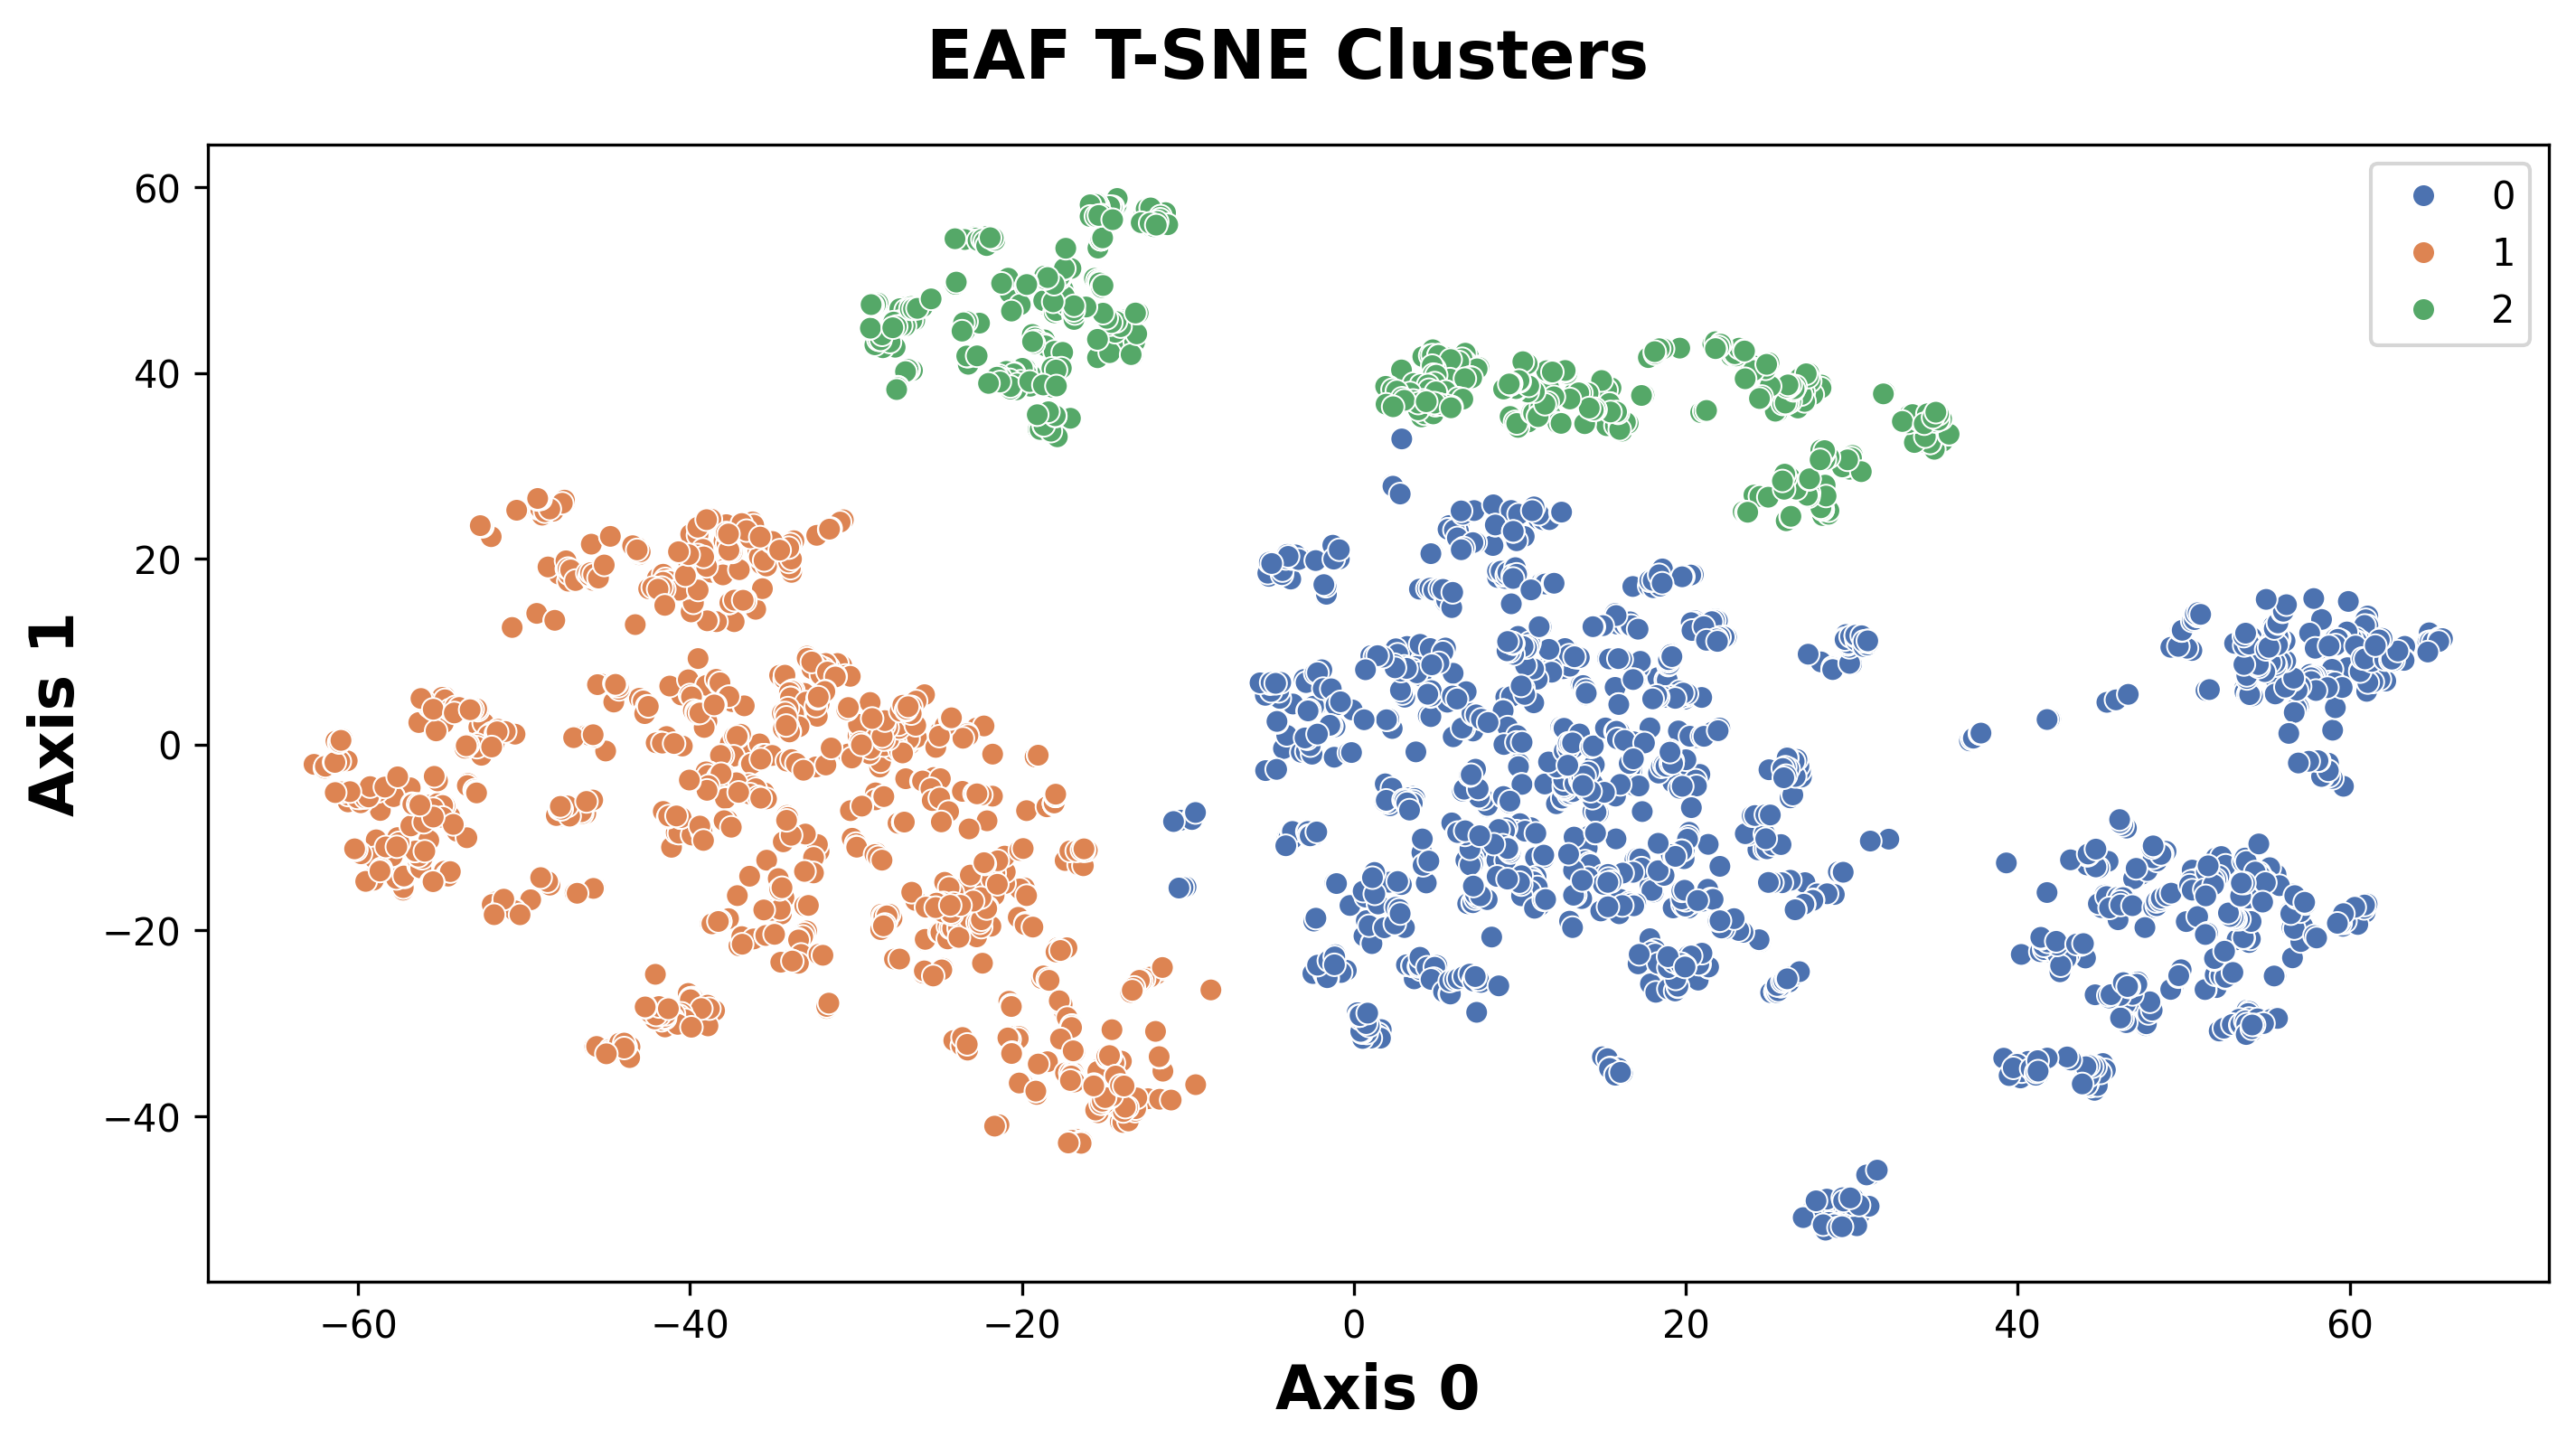

(3317, 50)
Index(['c (Coke1030)', 's (Coke1030)', 's112 (Coke1030)', 'c (CokeFine)',
       's (CokeFine)', 's05 (CokeFine)', 'cao (Dolomite)', 'mgo (Dolomite)',
       's0_95 (Dolomite)', 's95_385 (Dolomite)', 's385_1000 (Dolomite)',
       'fe_metal (DRI)', 'fe_total (DRI)', 'md (DRI)', 'c (DRI)',
       'gunge (DRI)', 'feo (DRI)', 'feo_c (DRI)', 'cao (Lime)', 'mgo (Lime)',
       's0_95 (Lime)', 'cao (Slag)', 'feo (Slag)', 'sio2 (Slag)', 'mgo (Slag)',
       'al2o3 (Slag)', 'p2o5 (Slag)', 'mno (Slag)', 'b2 (Slag)', 'b3 (Slag)',
       'b4 (Slag)', 'Duration (EAF)', 'Power On (EAF)', 'Power Off (EAF)',
       'Delays (EAF)', 'DRI [t] (EAF)', 'Ele [MW] (EAF)', 'Tapped [t] (EAF)',
       'Tapped [kWh/t] (EAF)', 'O2 [Nm3] (EAF)', 'CH4 [Nm3] (EAF)',
       'C.inj [kg] (EAF)', 'Chemical [MWh] (EAF)', 'C [kg] (EAF)',
       'CaO [kg] (EAF)', 'MgO [kg] (EAF)', 'Tapping Time [Sec] (EAF)',
       'EAF_DRI (EAF)', 'HDRI(T) (EAF)'],
      dtype='object')


/tmp/ipykernel_13527/1974063651.py:66: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(
/tmp/ipykernel_13527/1974063651.py:66: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(
/tmp/ipykernel_13527/1974063651.py:66: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(
/tmp/ipykernel_13527/1974063651.py:66: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(
/tmp/ipykernel_13527/1974063651.py:66: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(
/tmp/ipykernel_13527/1974063651.py:66: UserWarning: The palette list has more values (10) than needed (3), which may not be intended.
  sns.kdeplot(
/tmp/ipykernel_13527/1974063651.py:66: UserWarning: The palette list has more values (10) than needed (3),

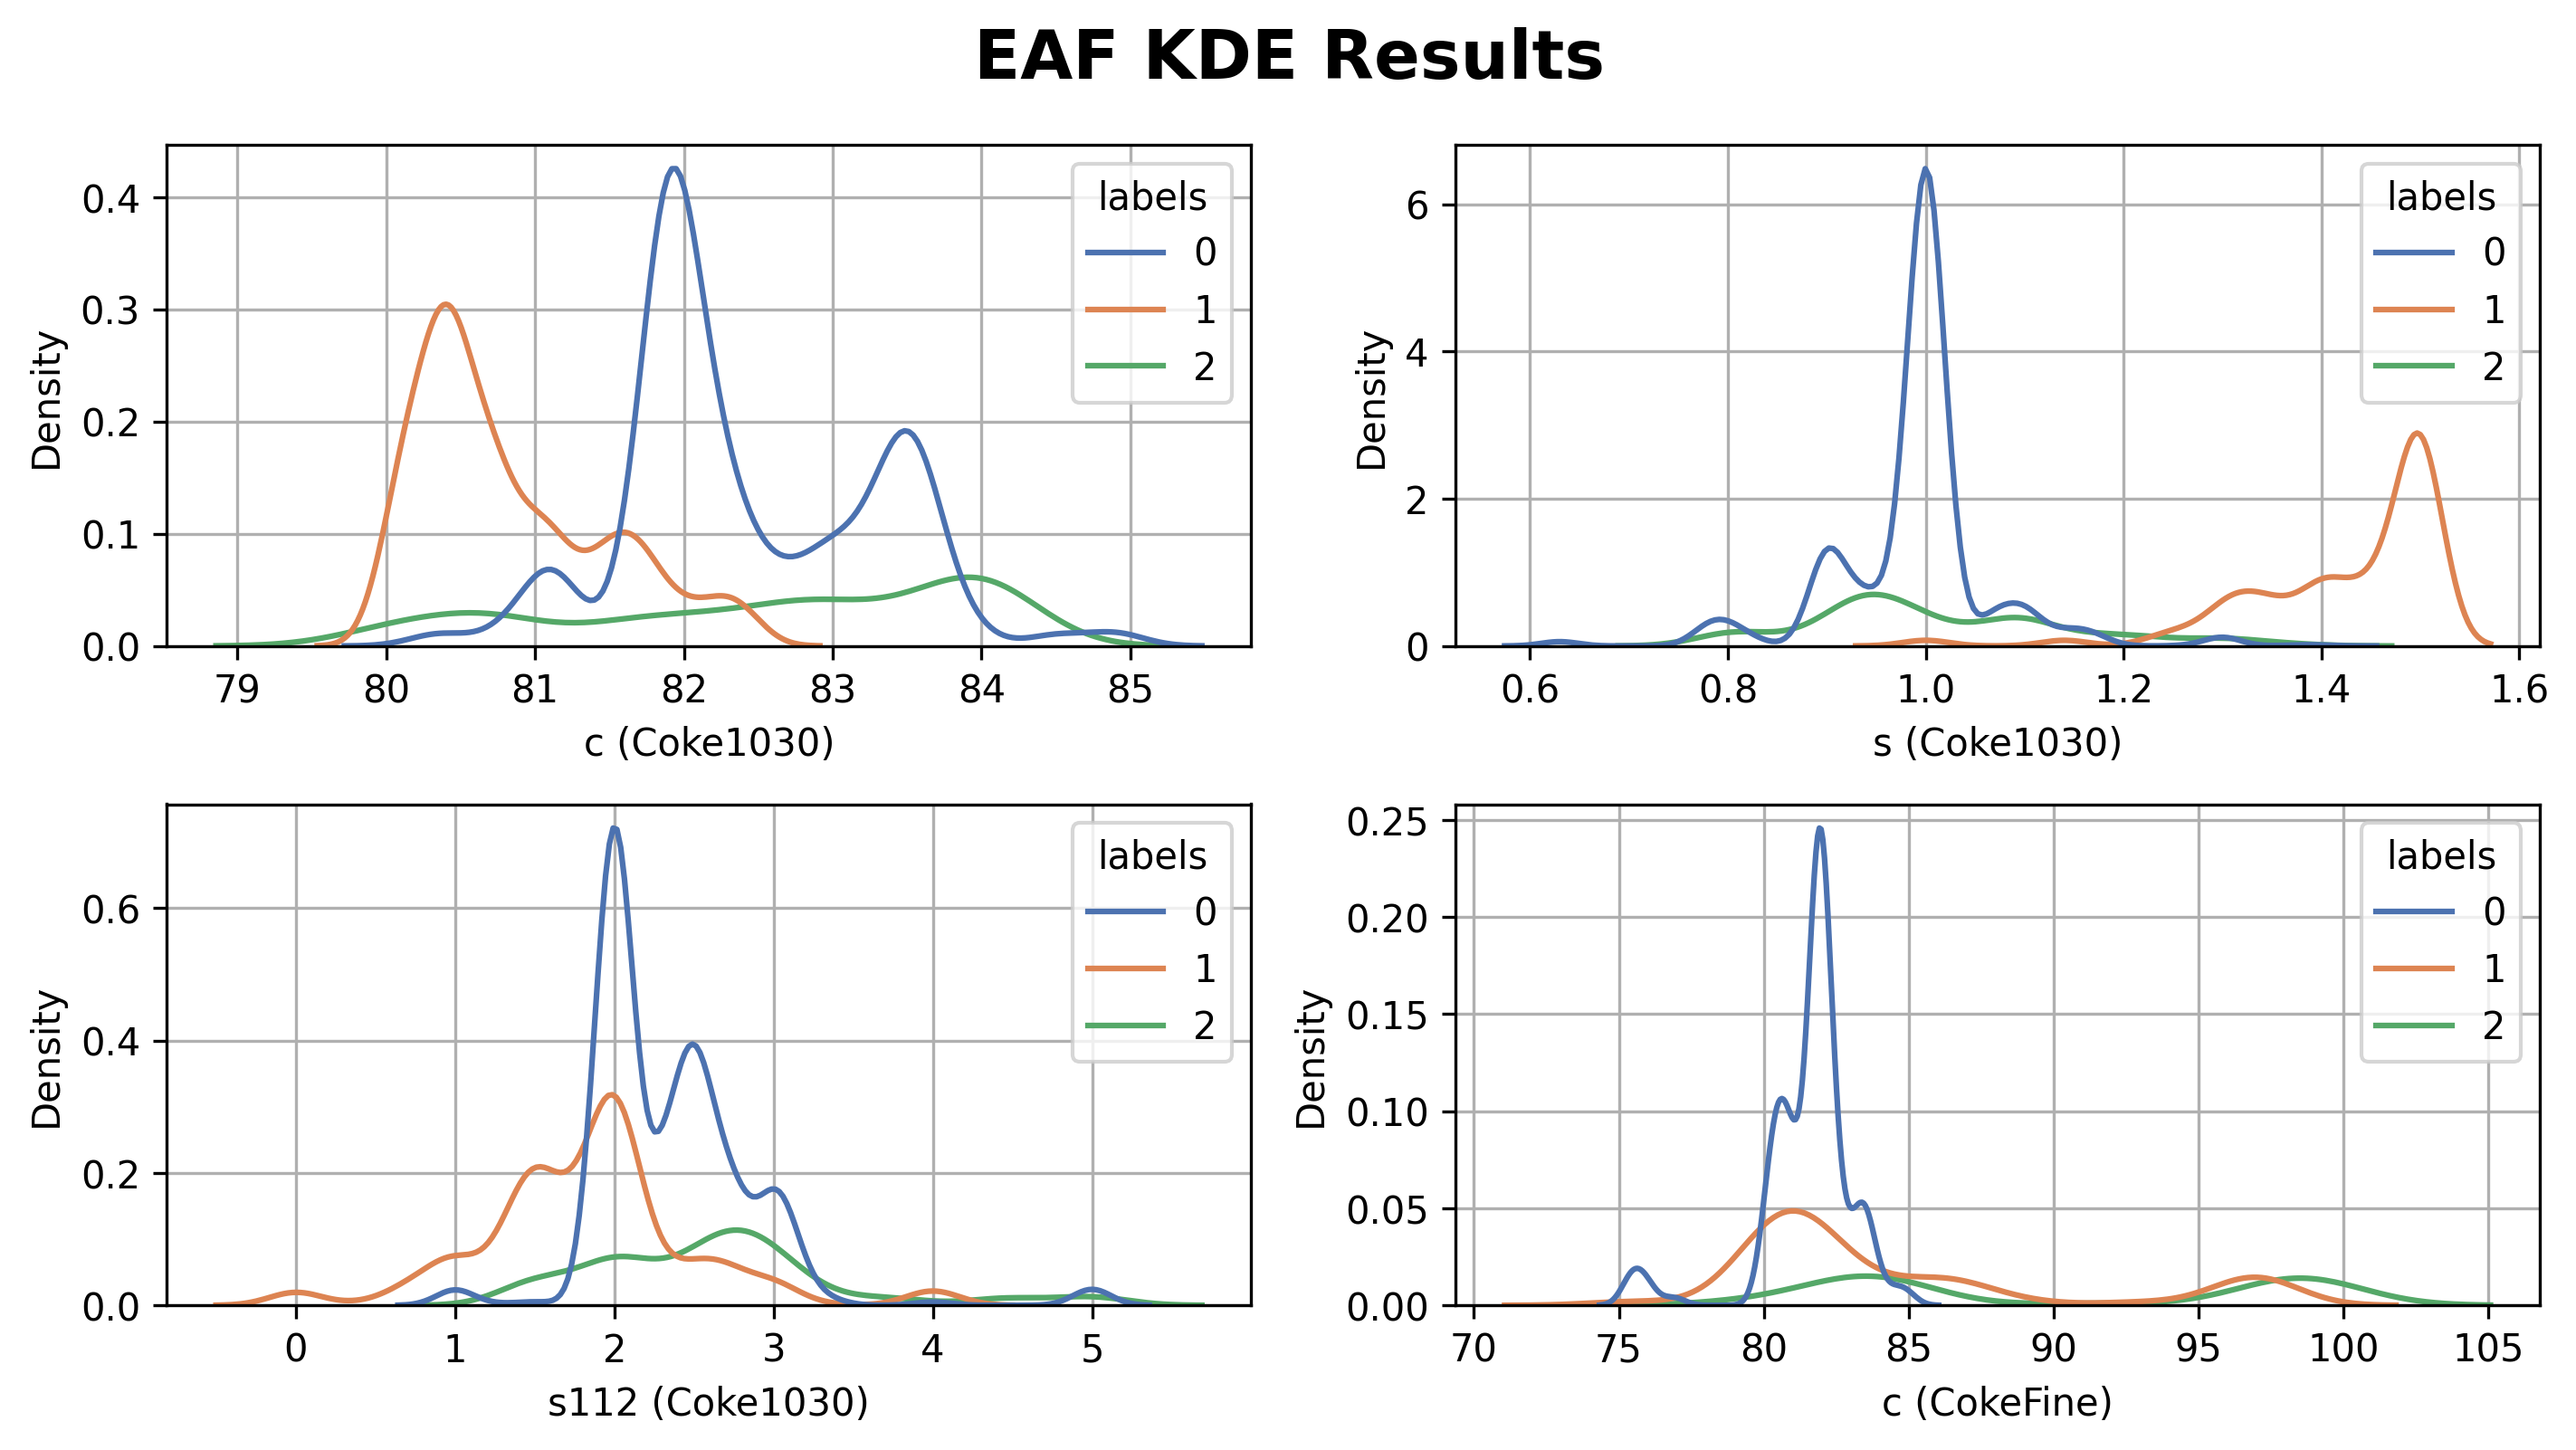

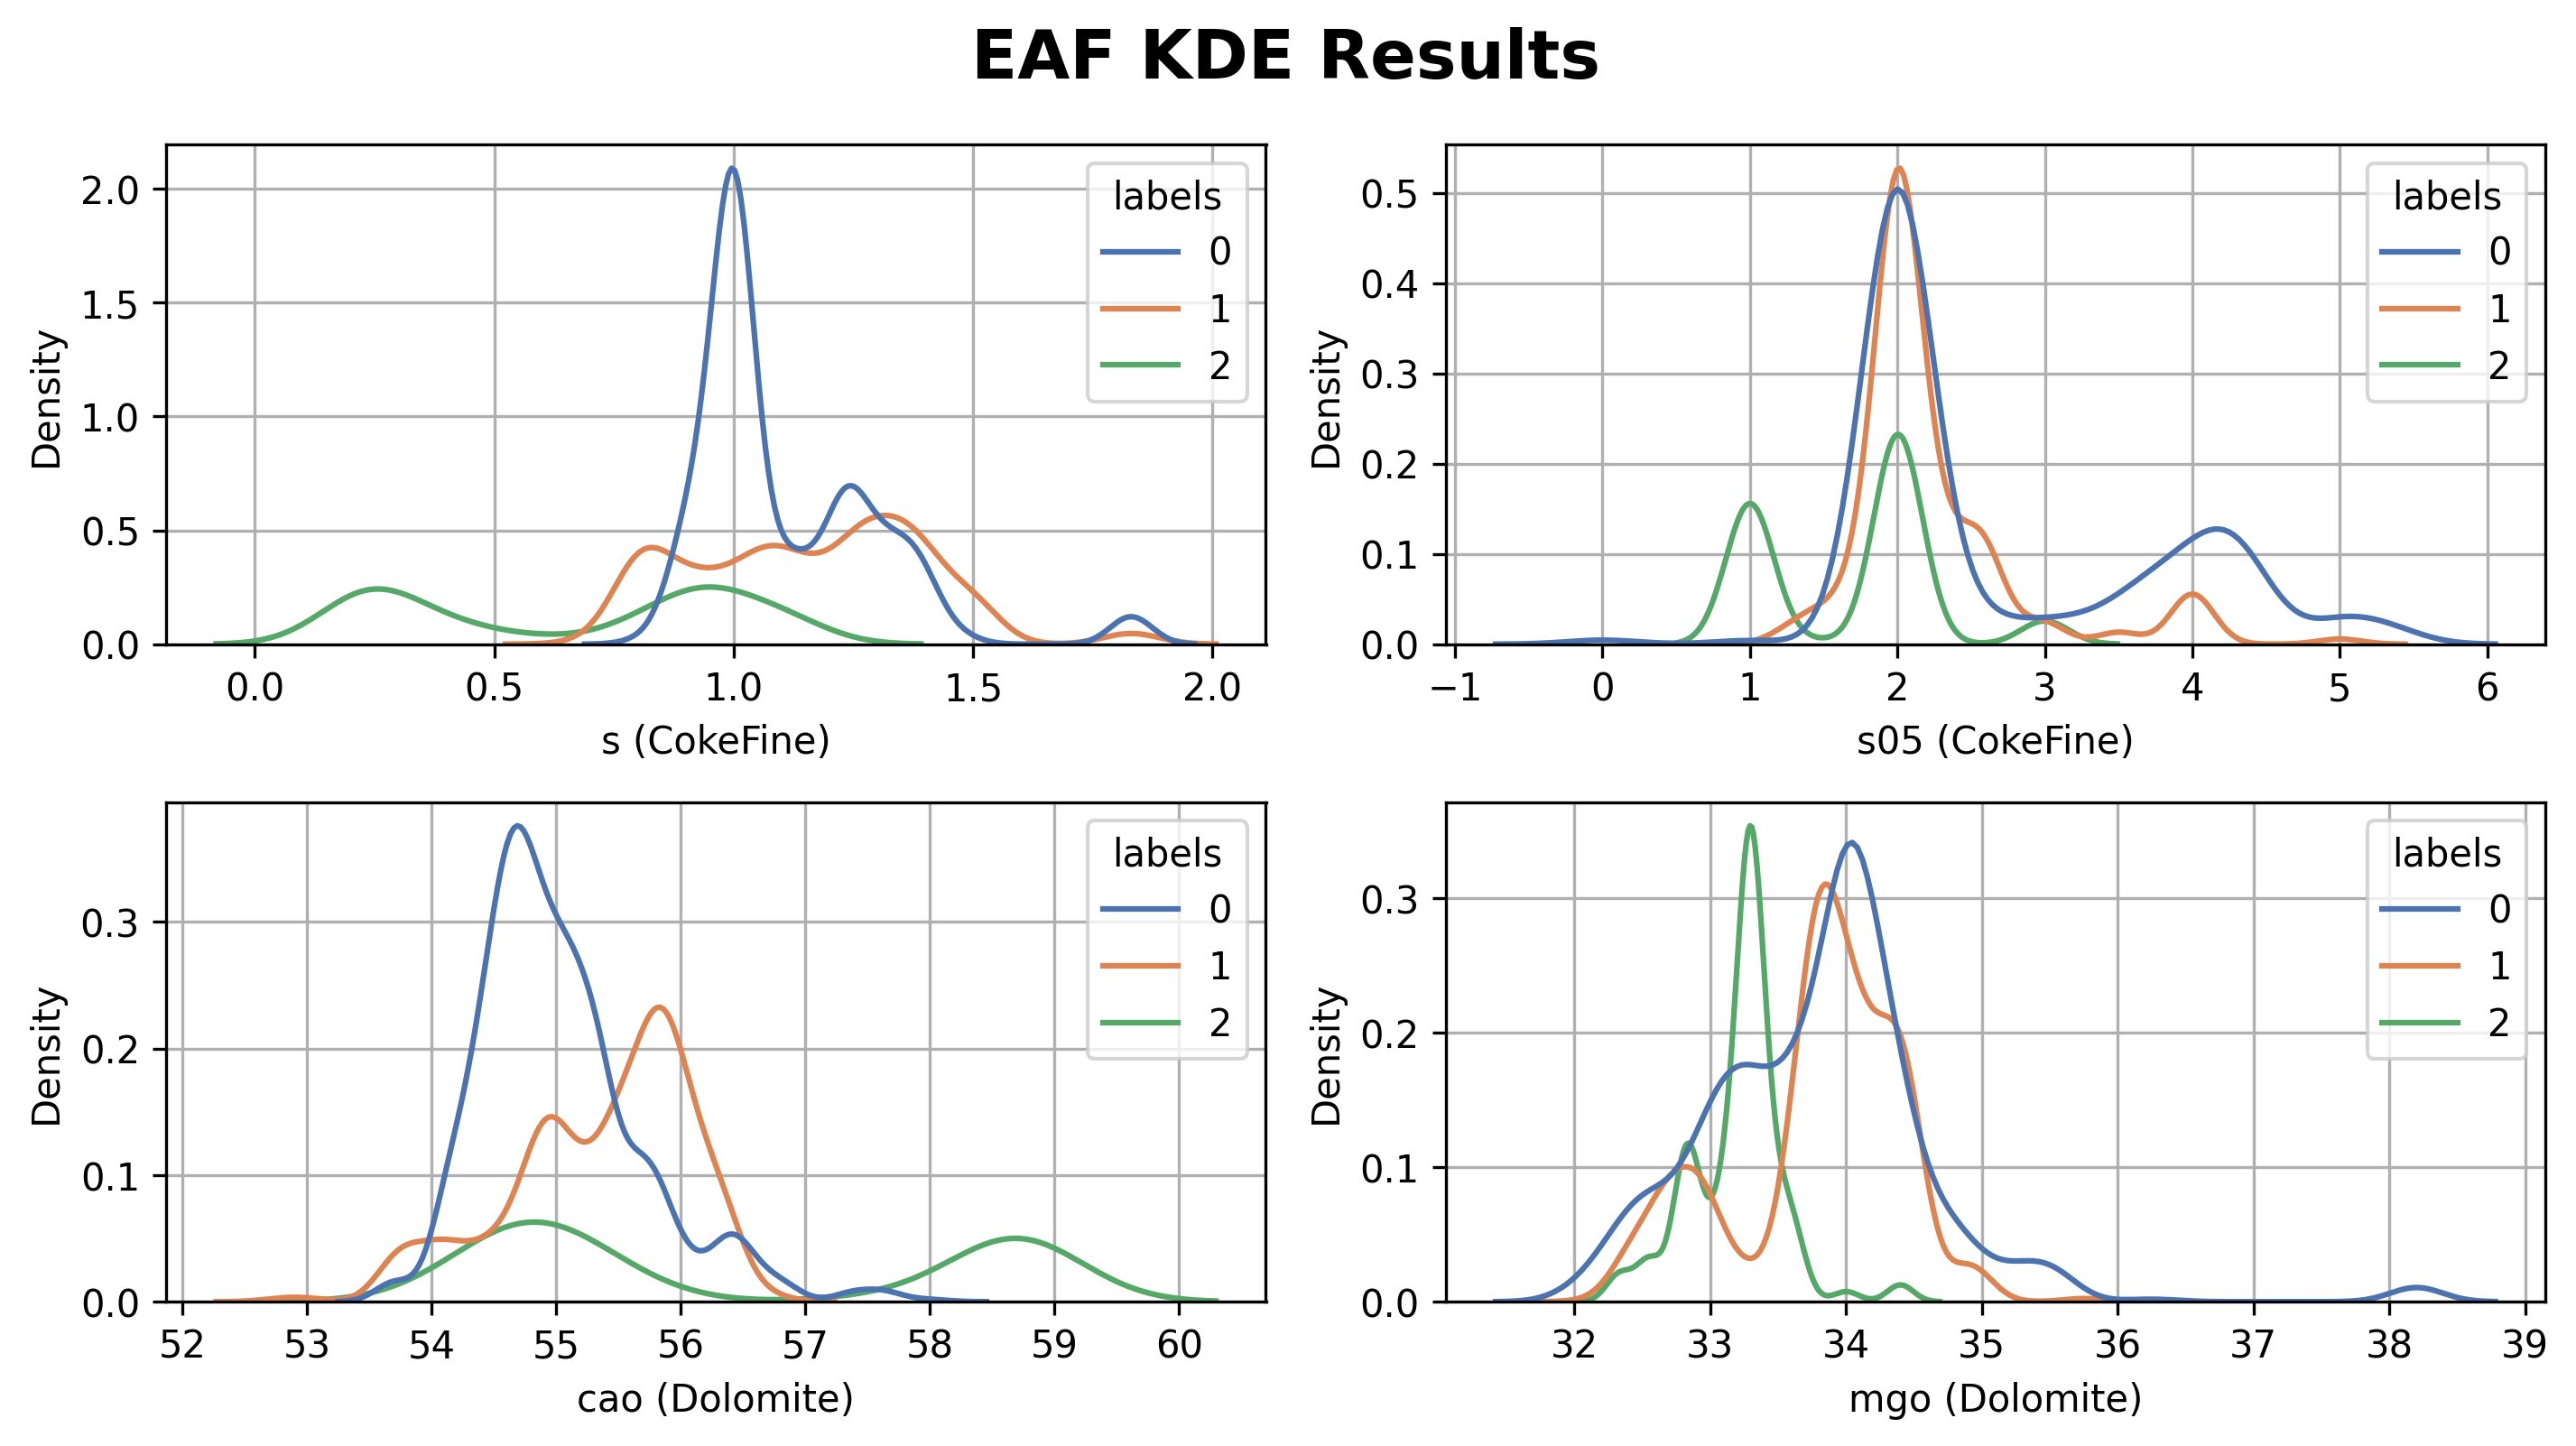

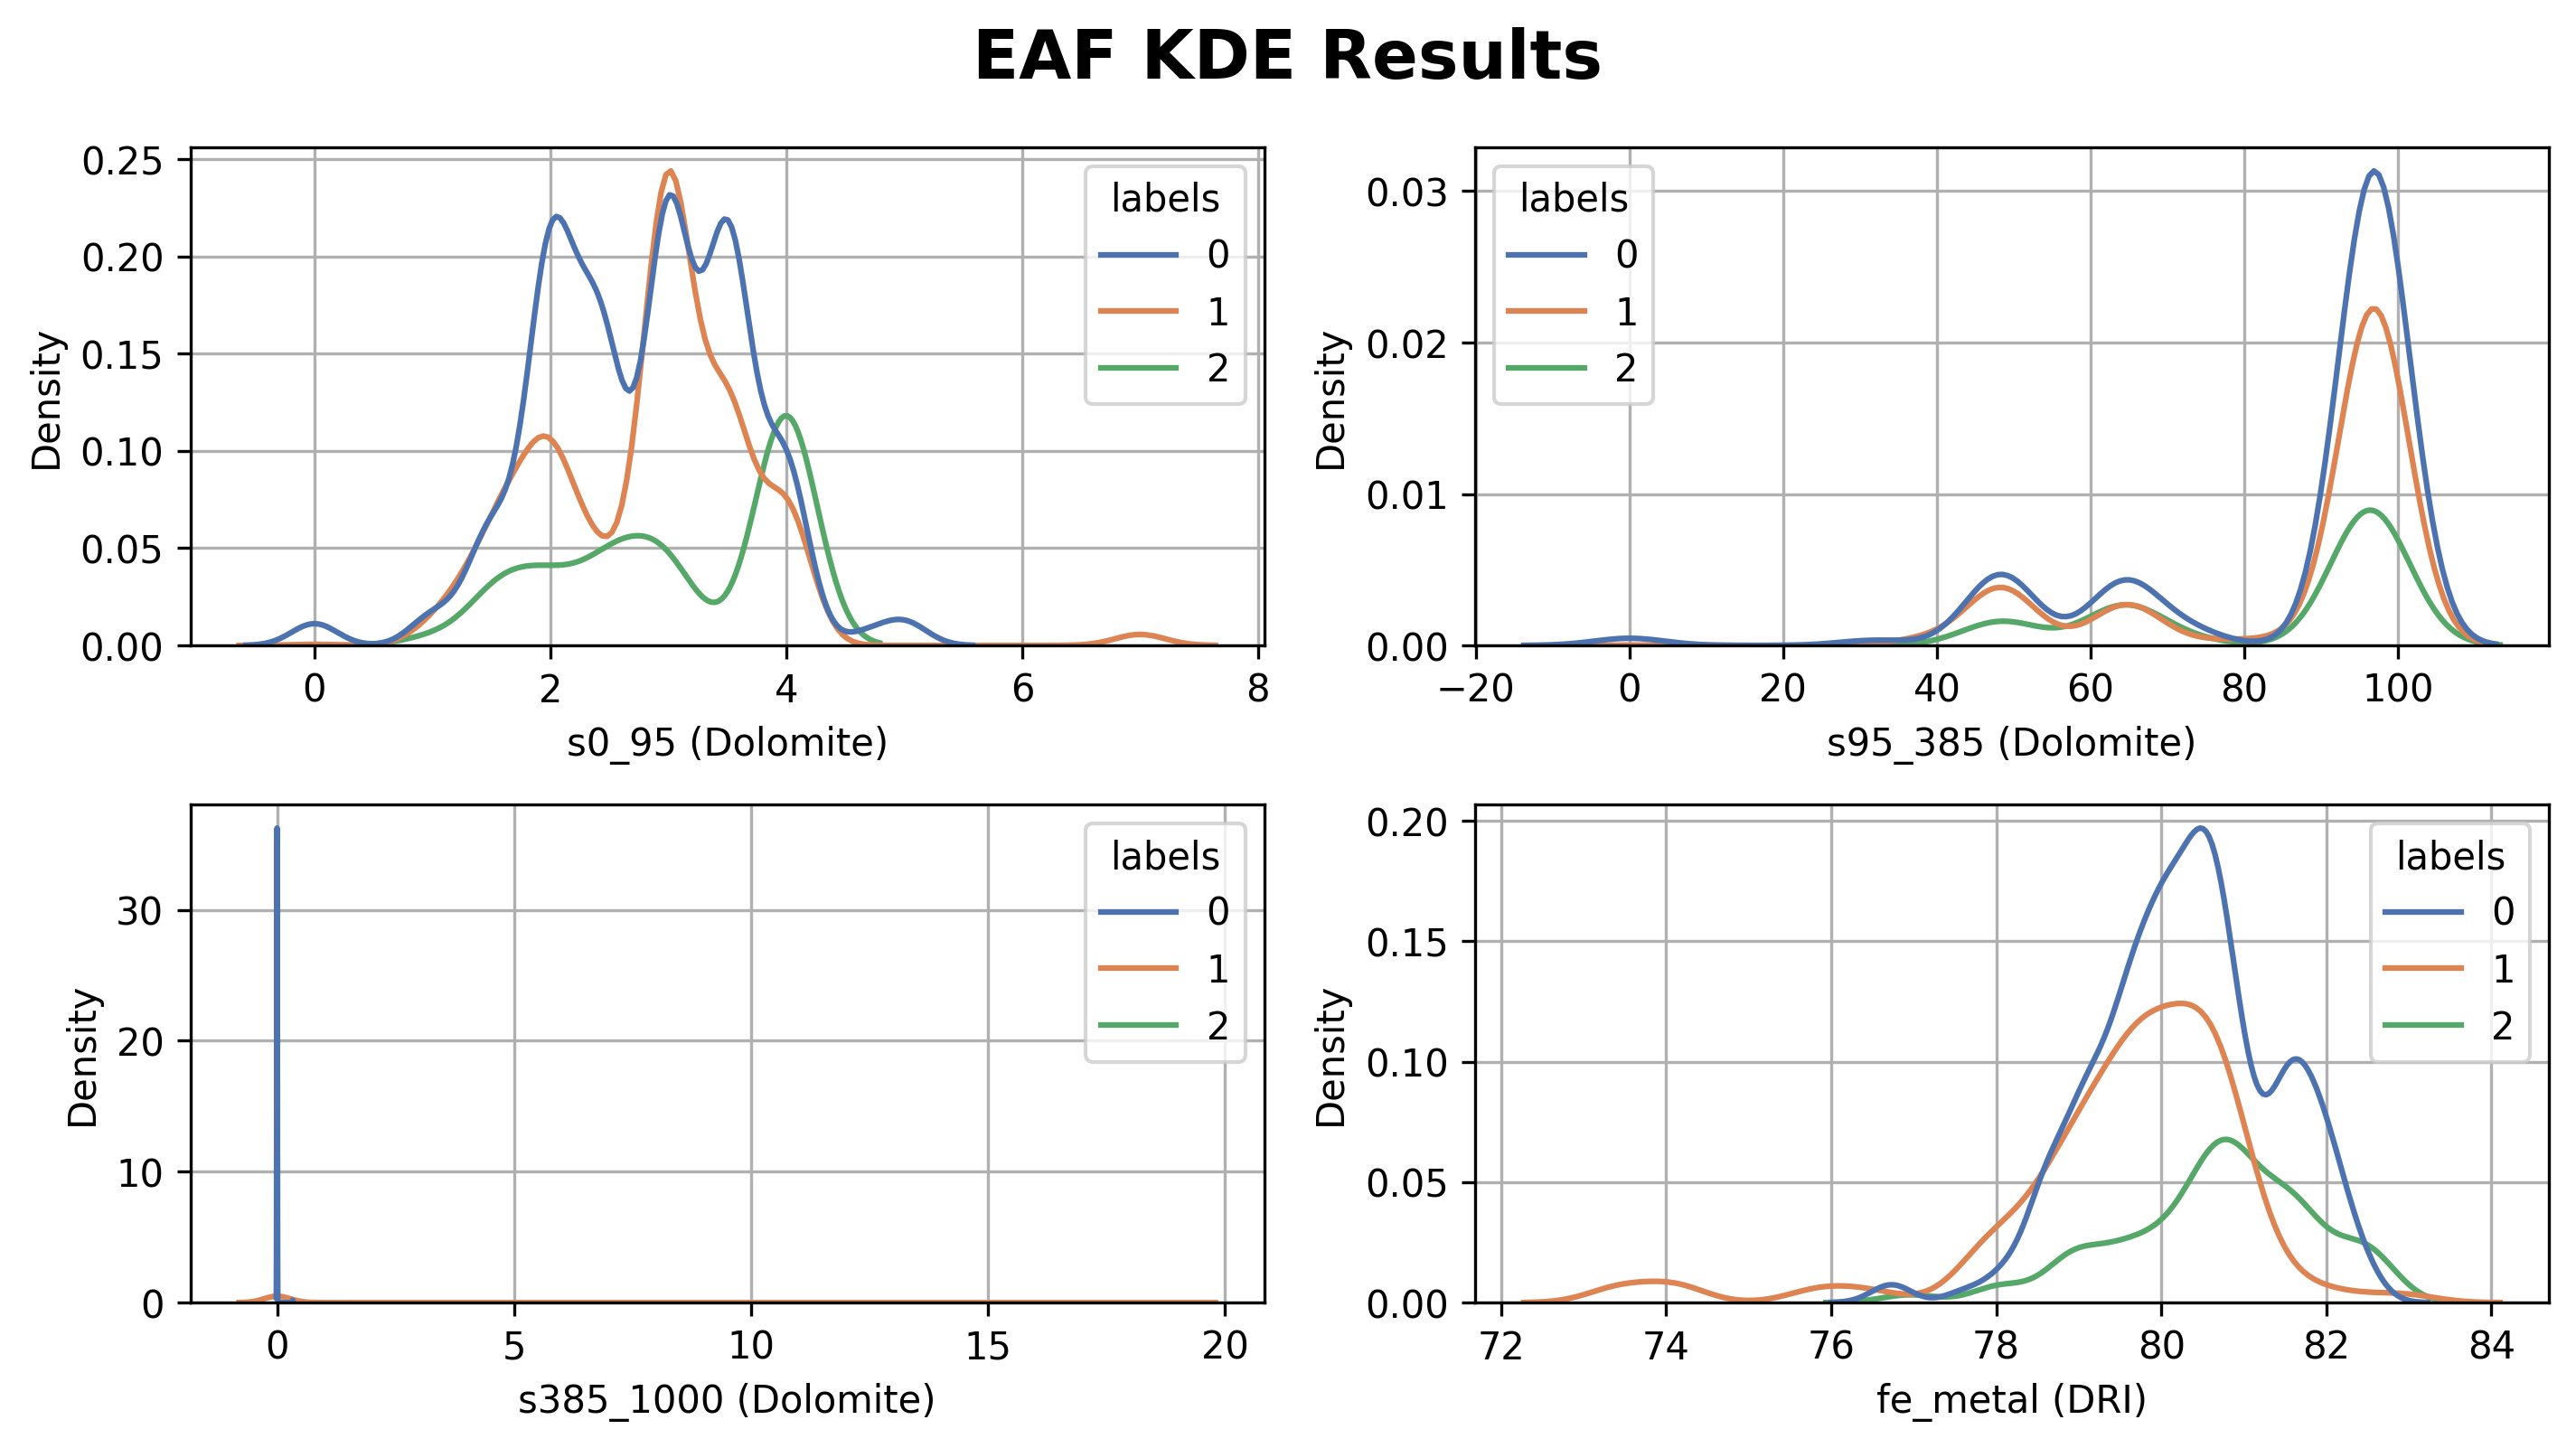

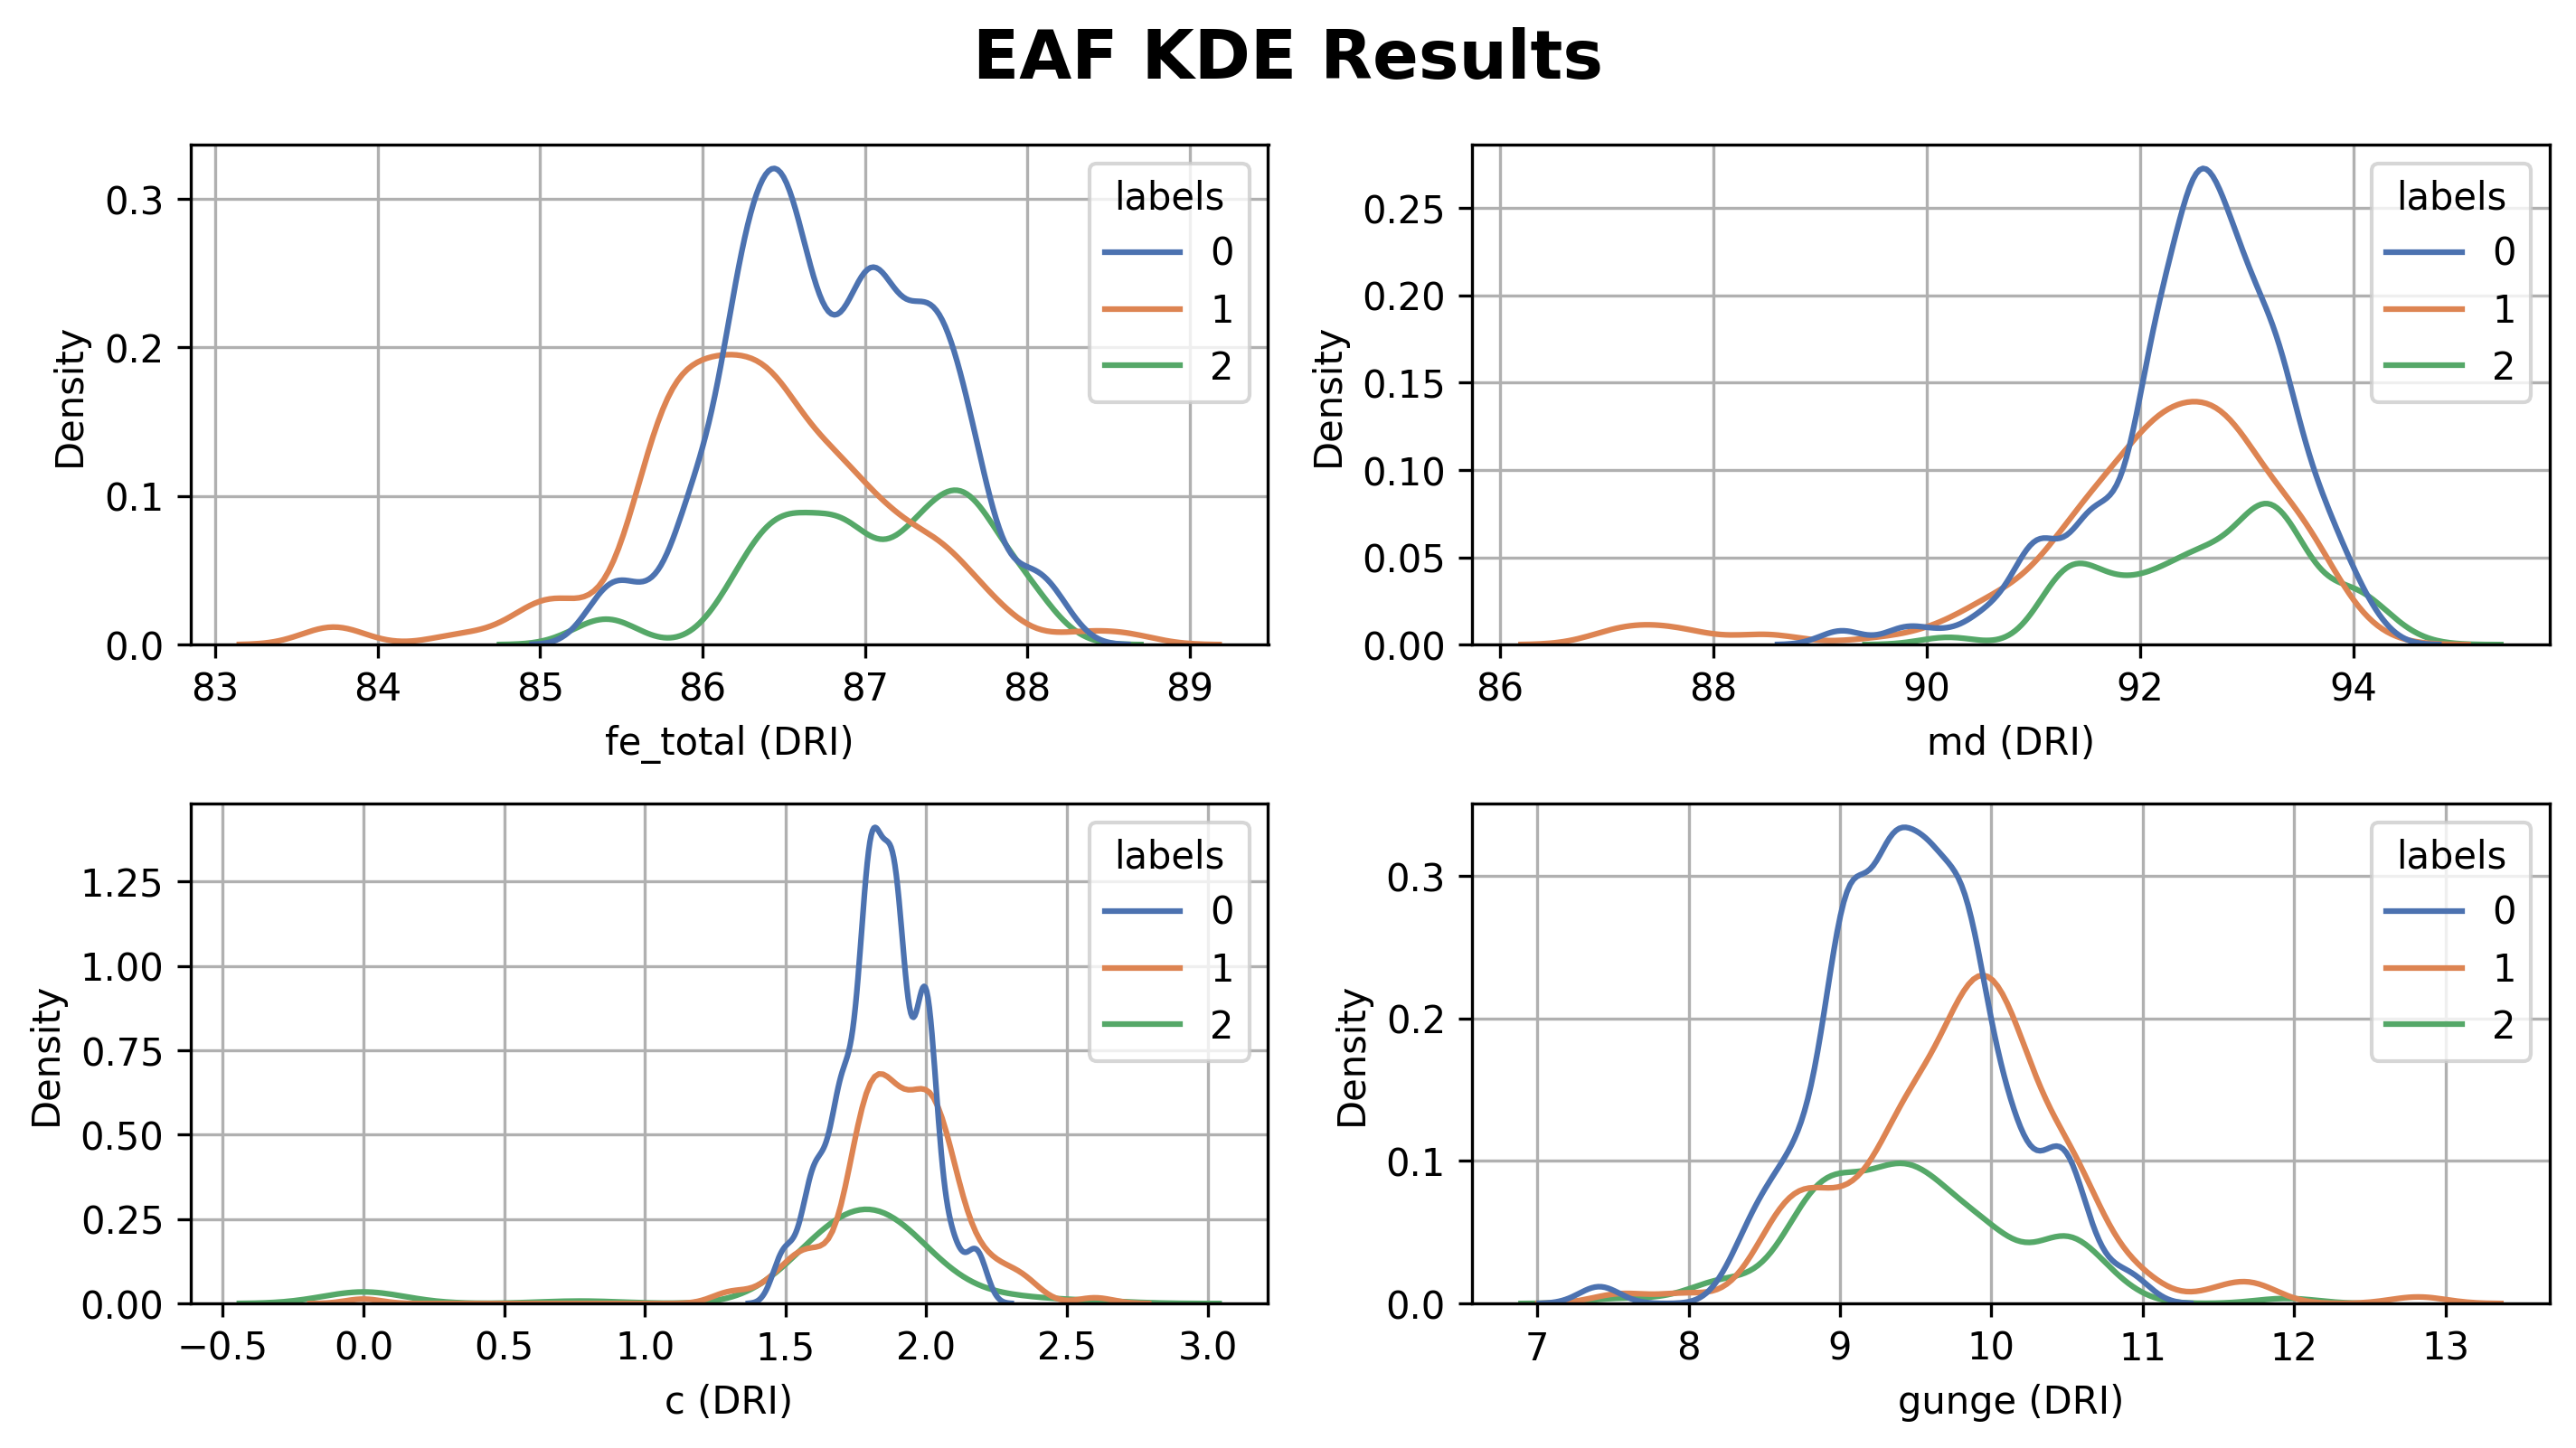

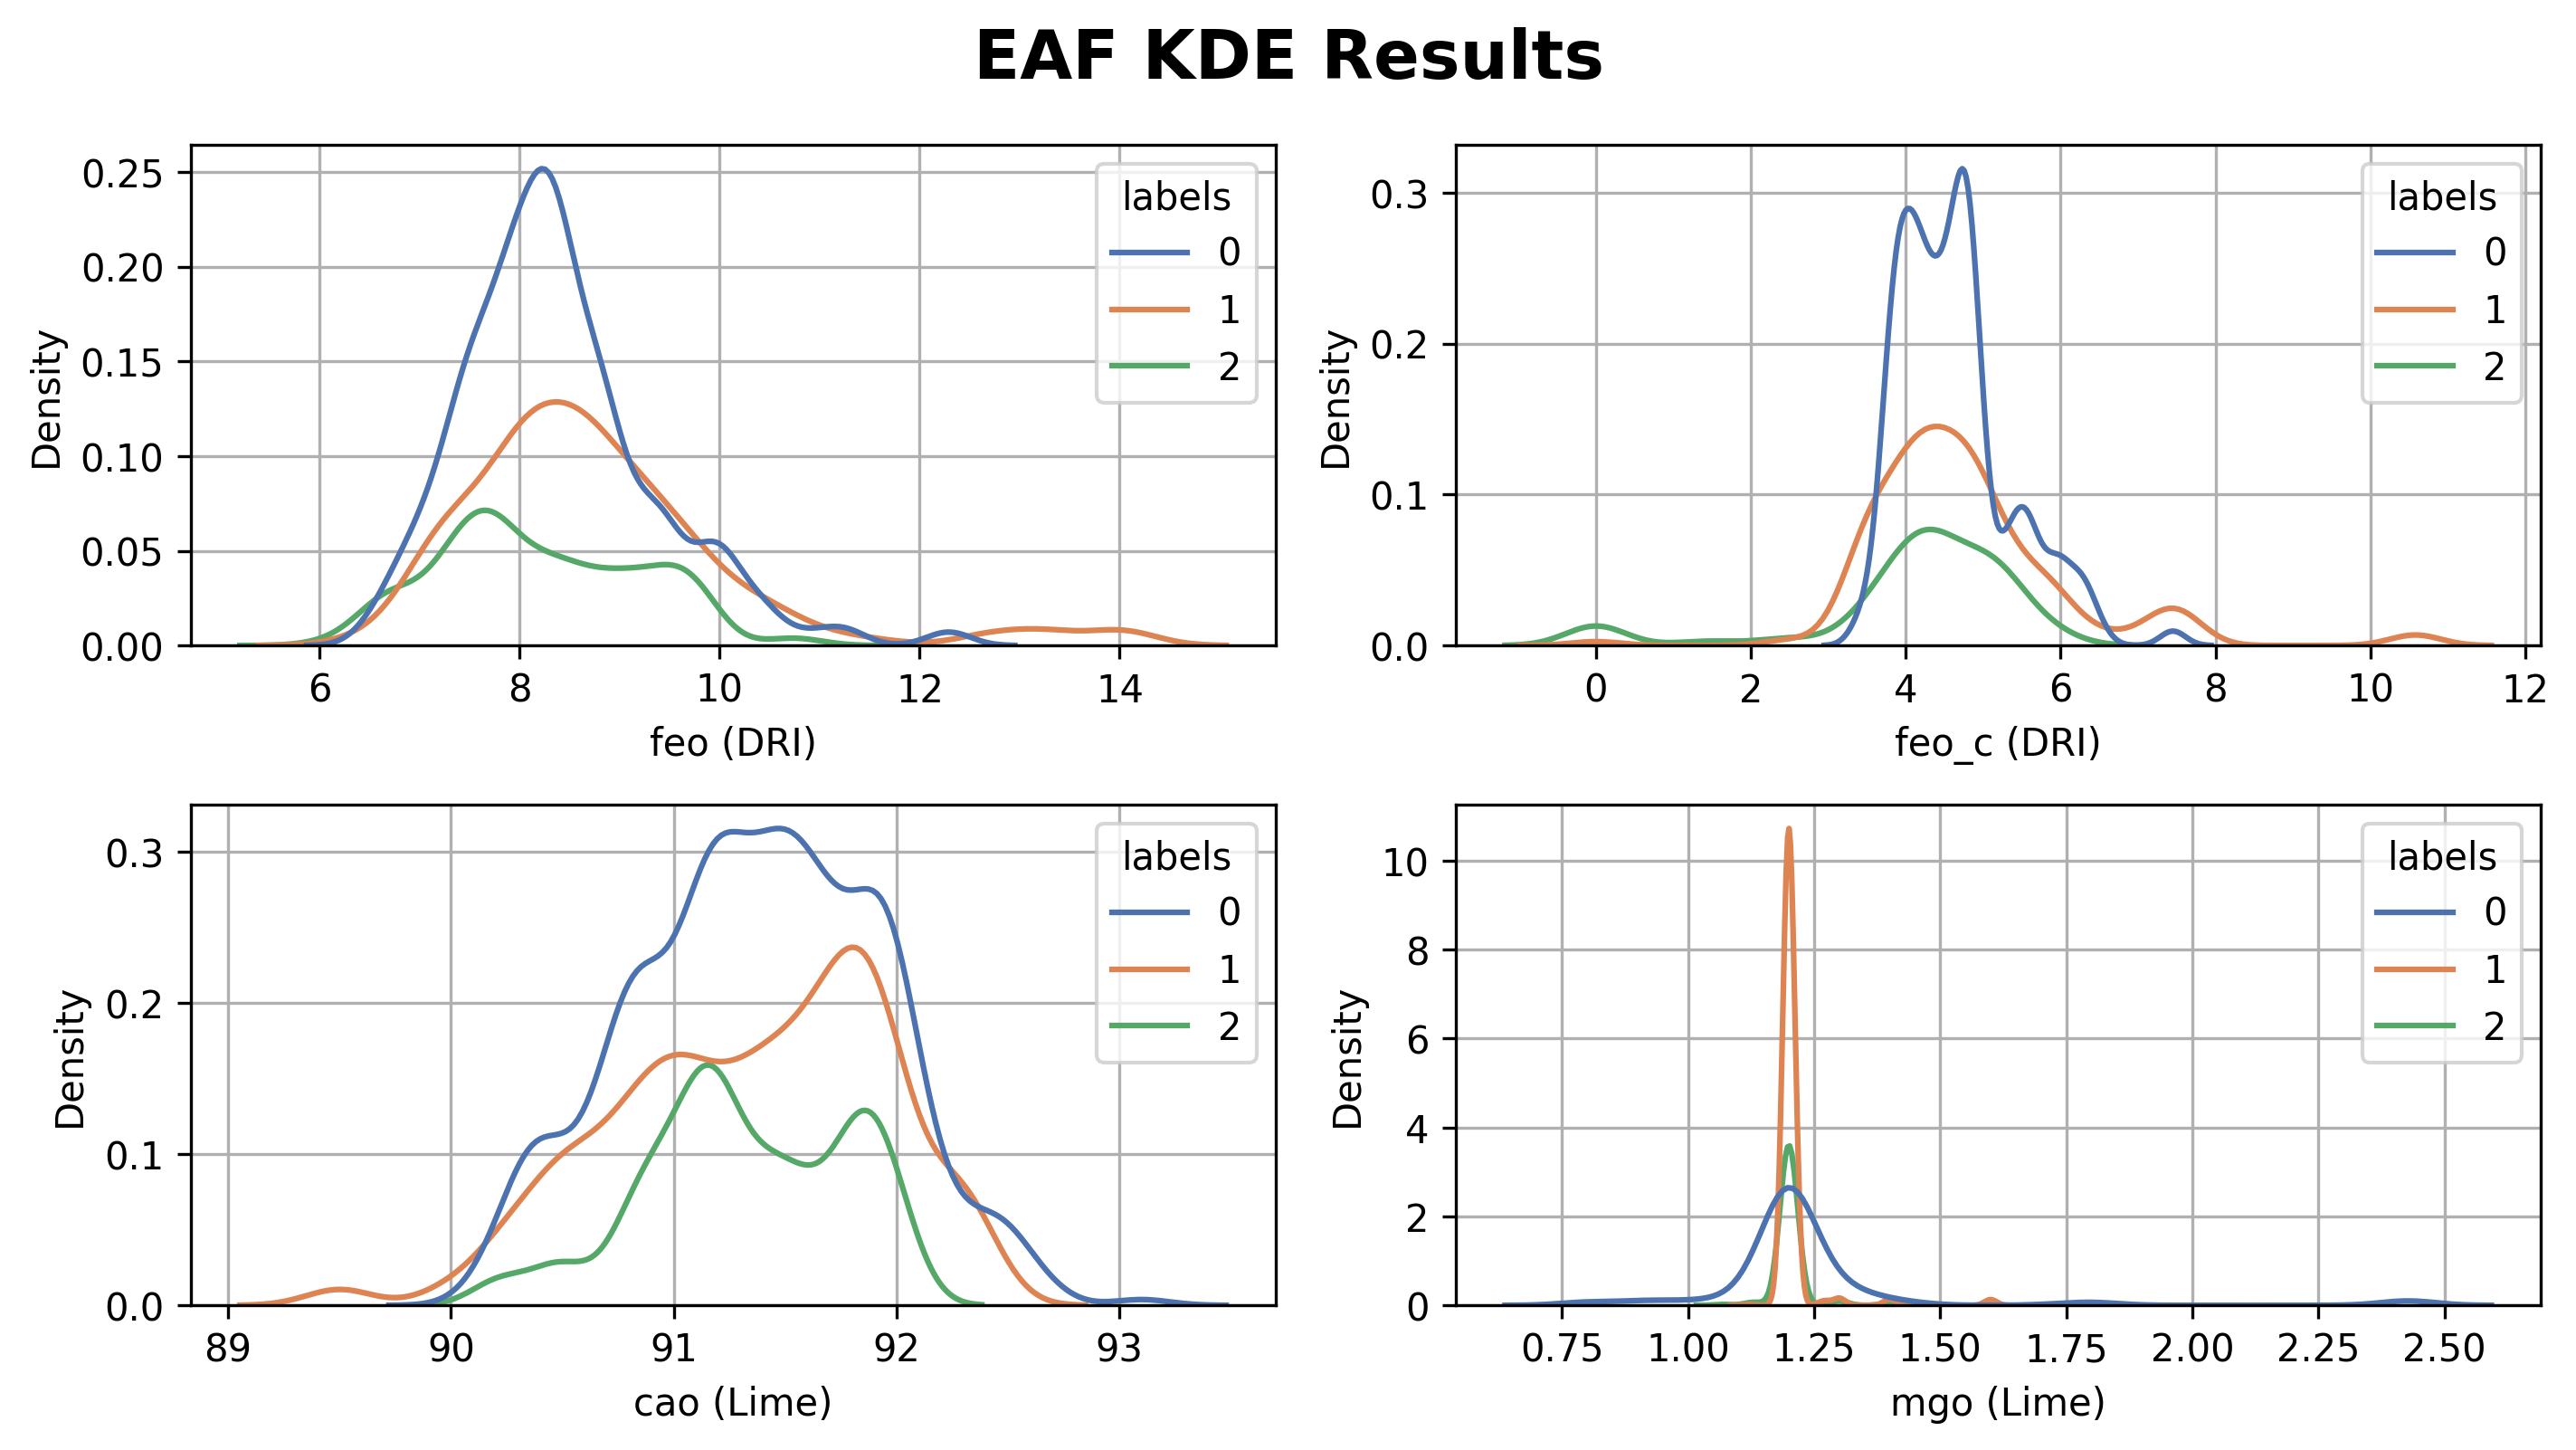

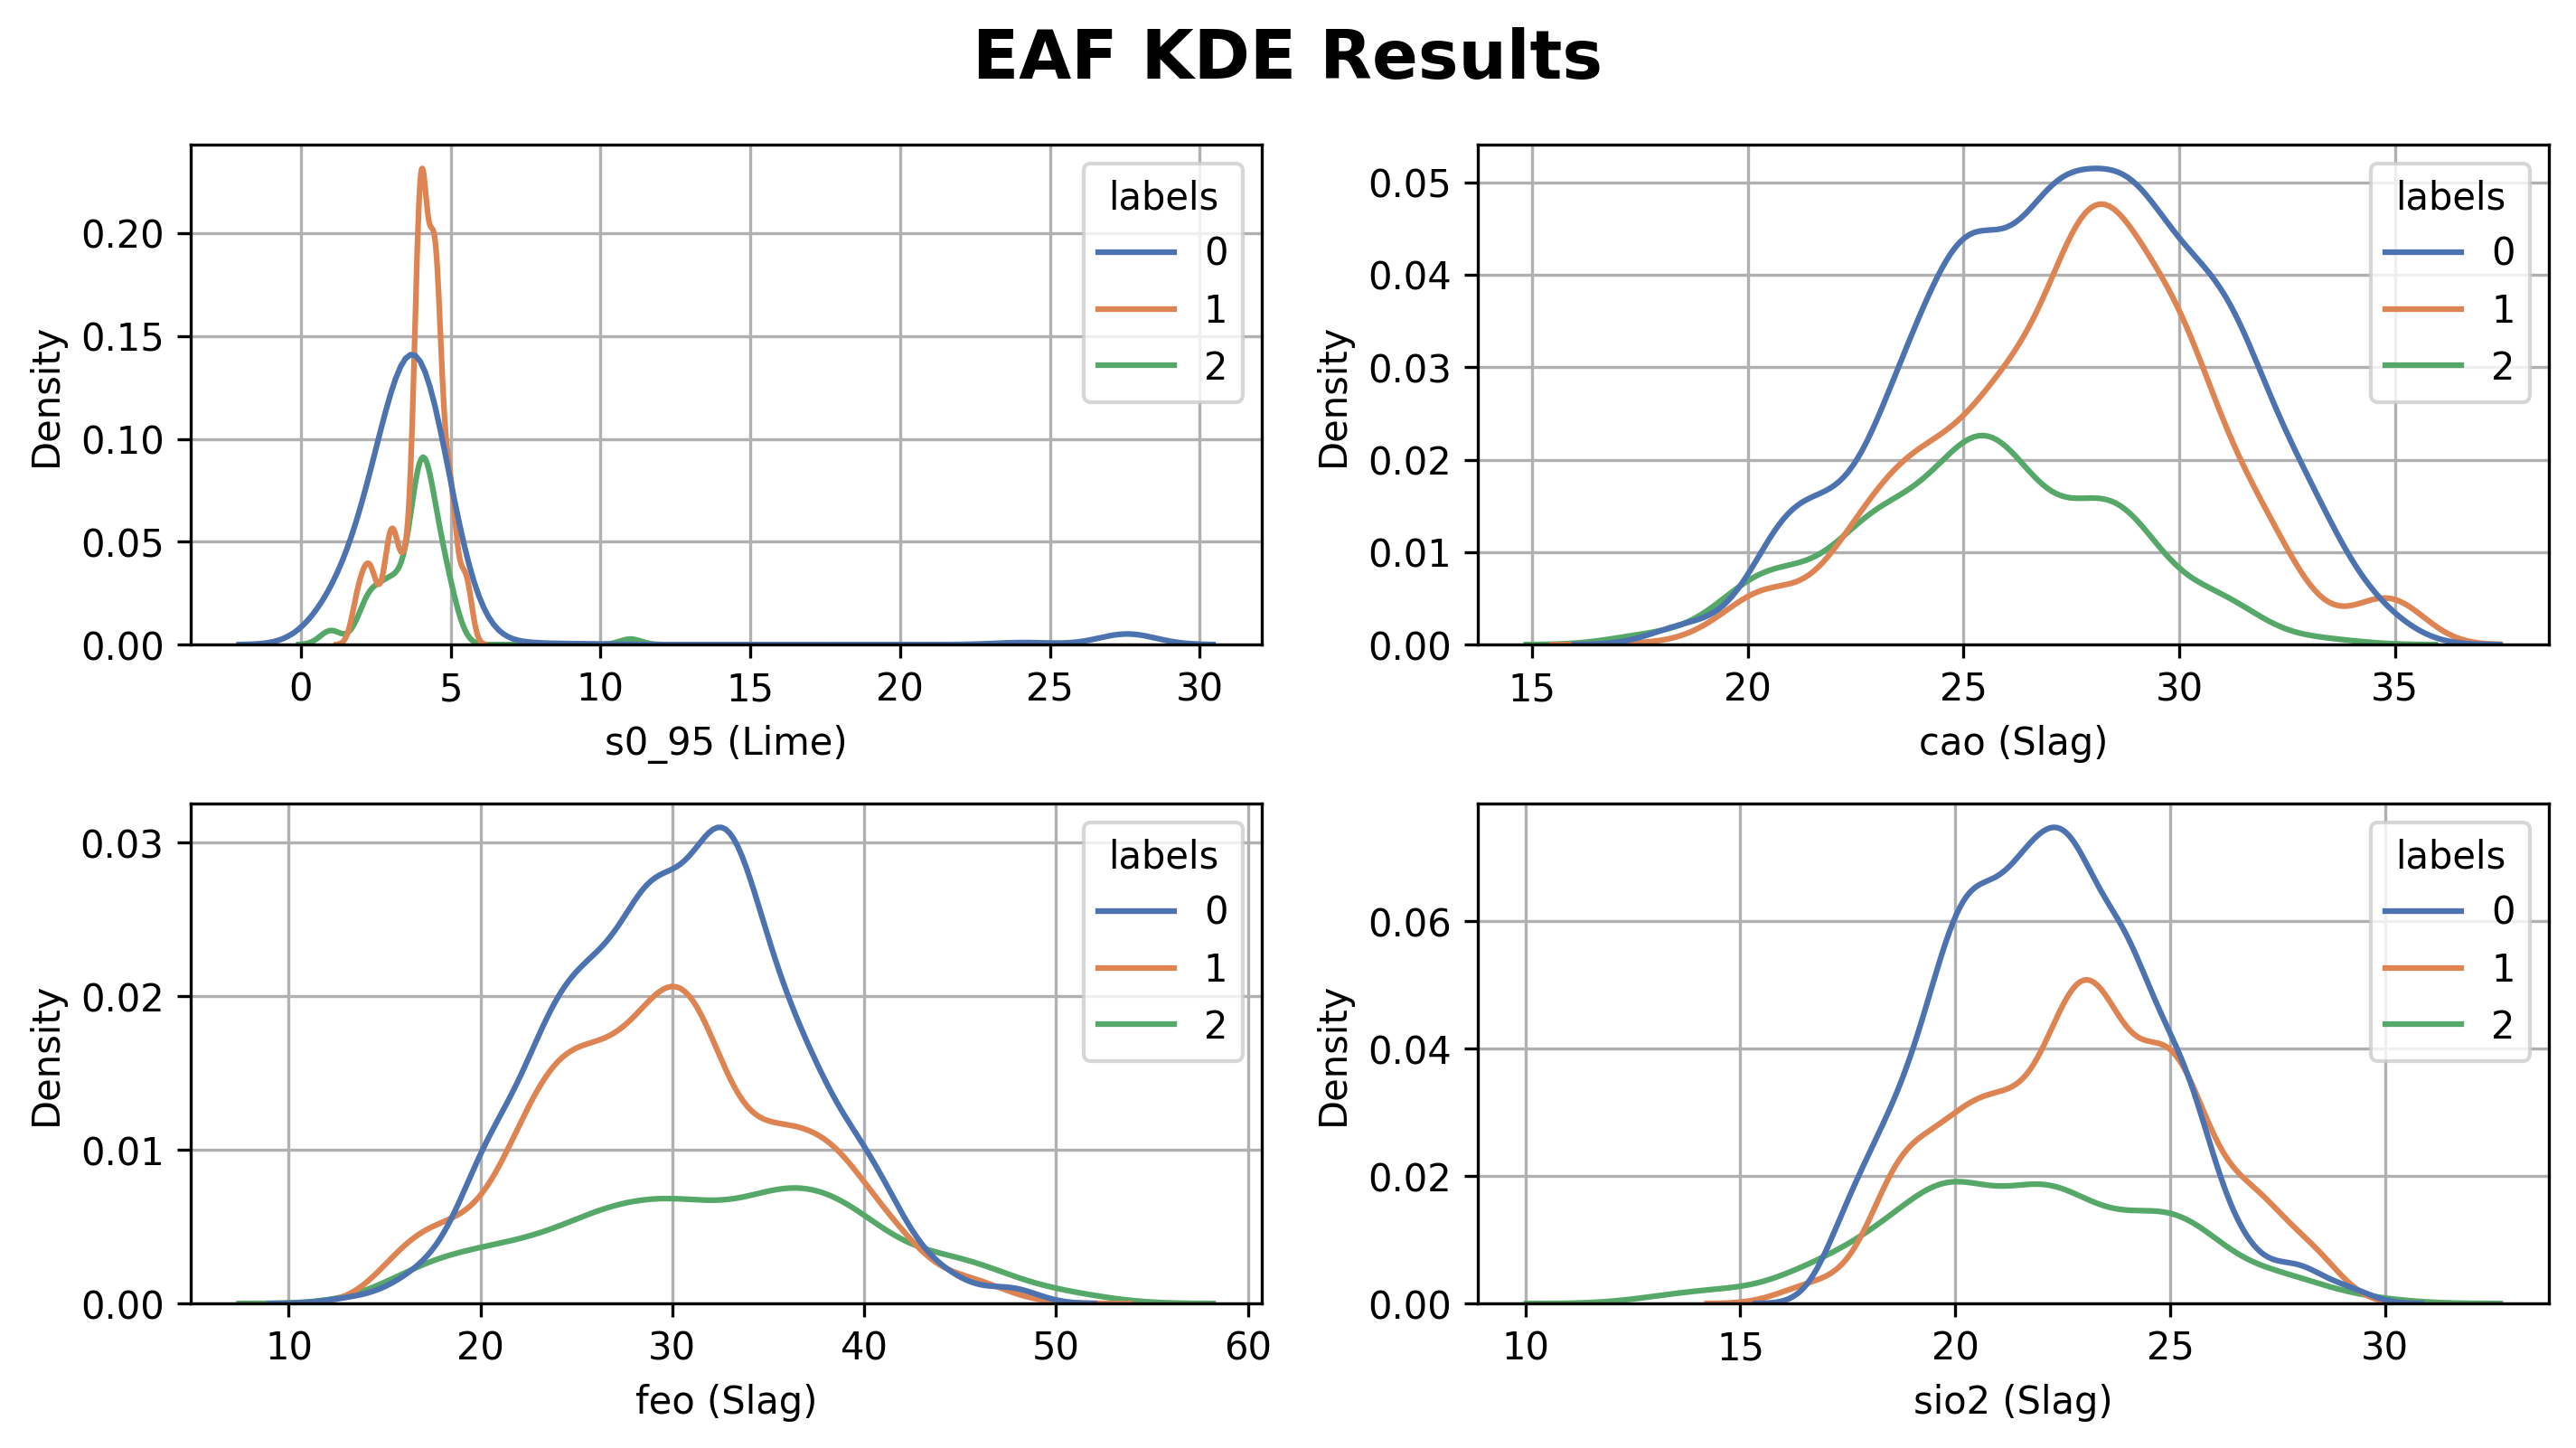

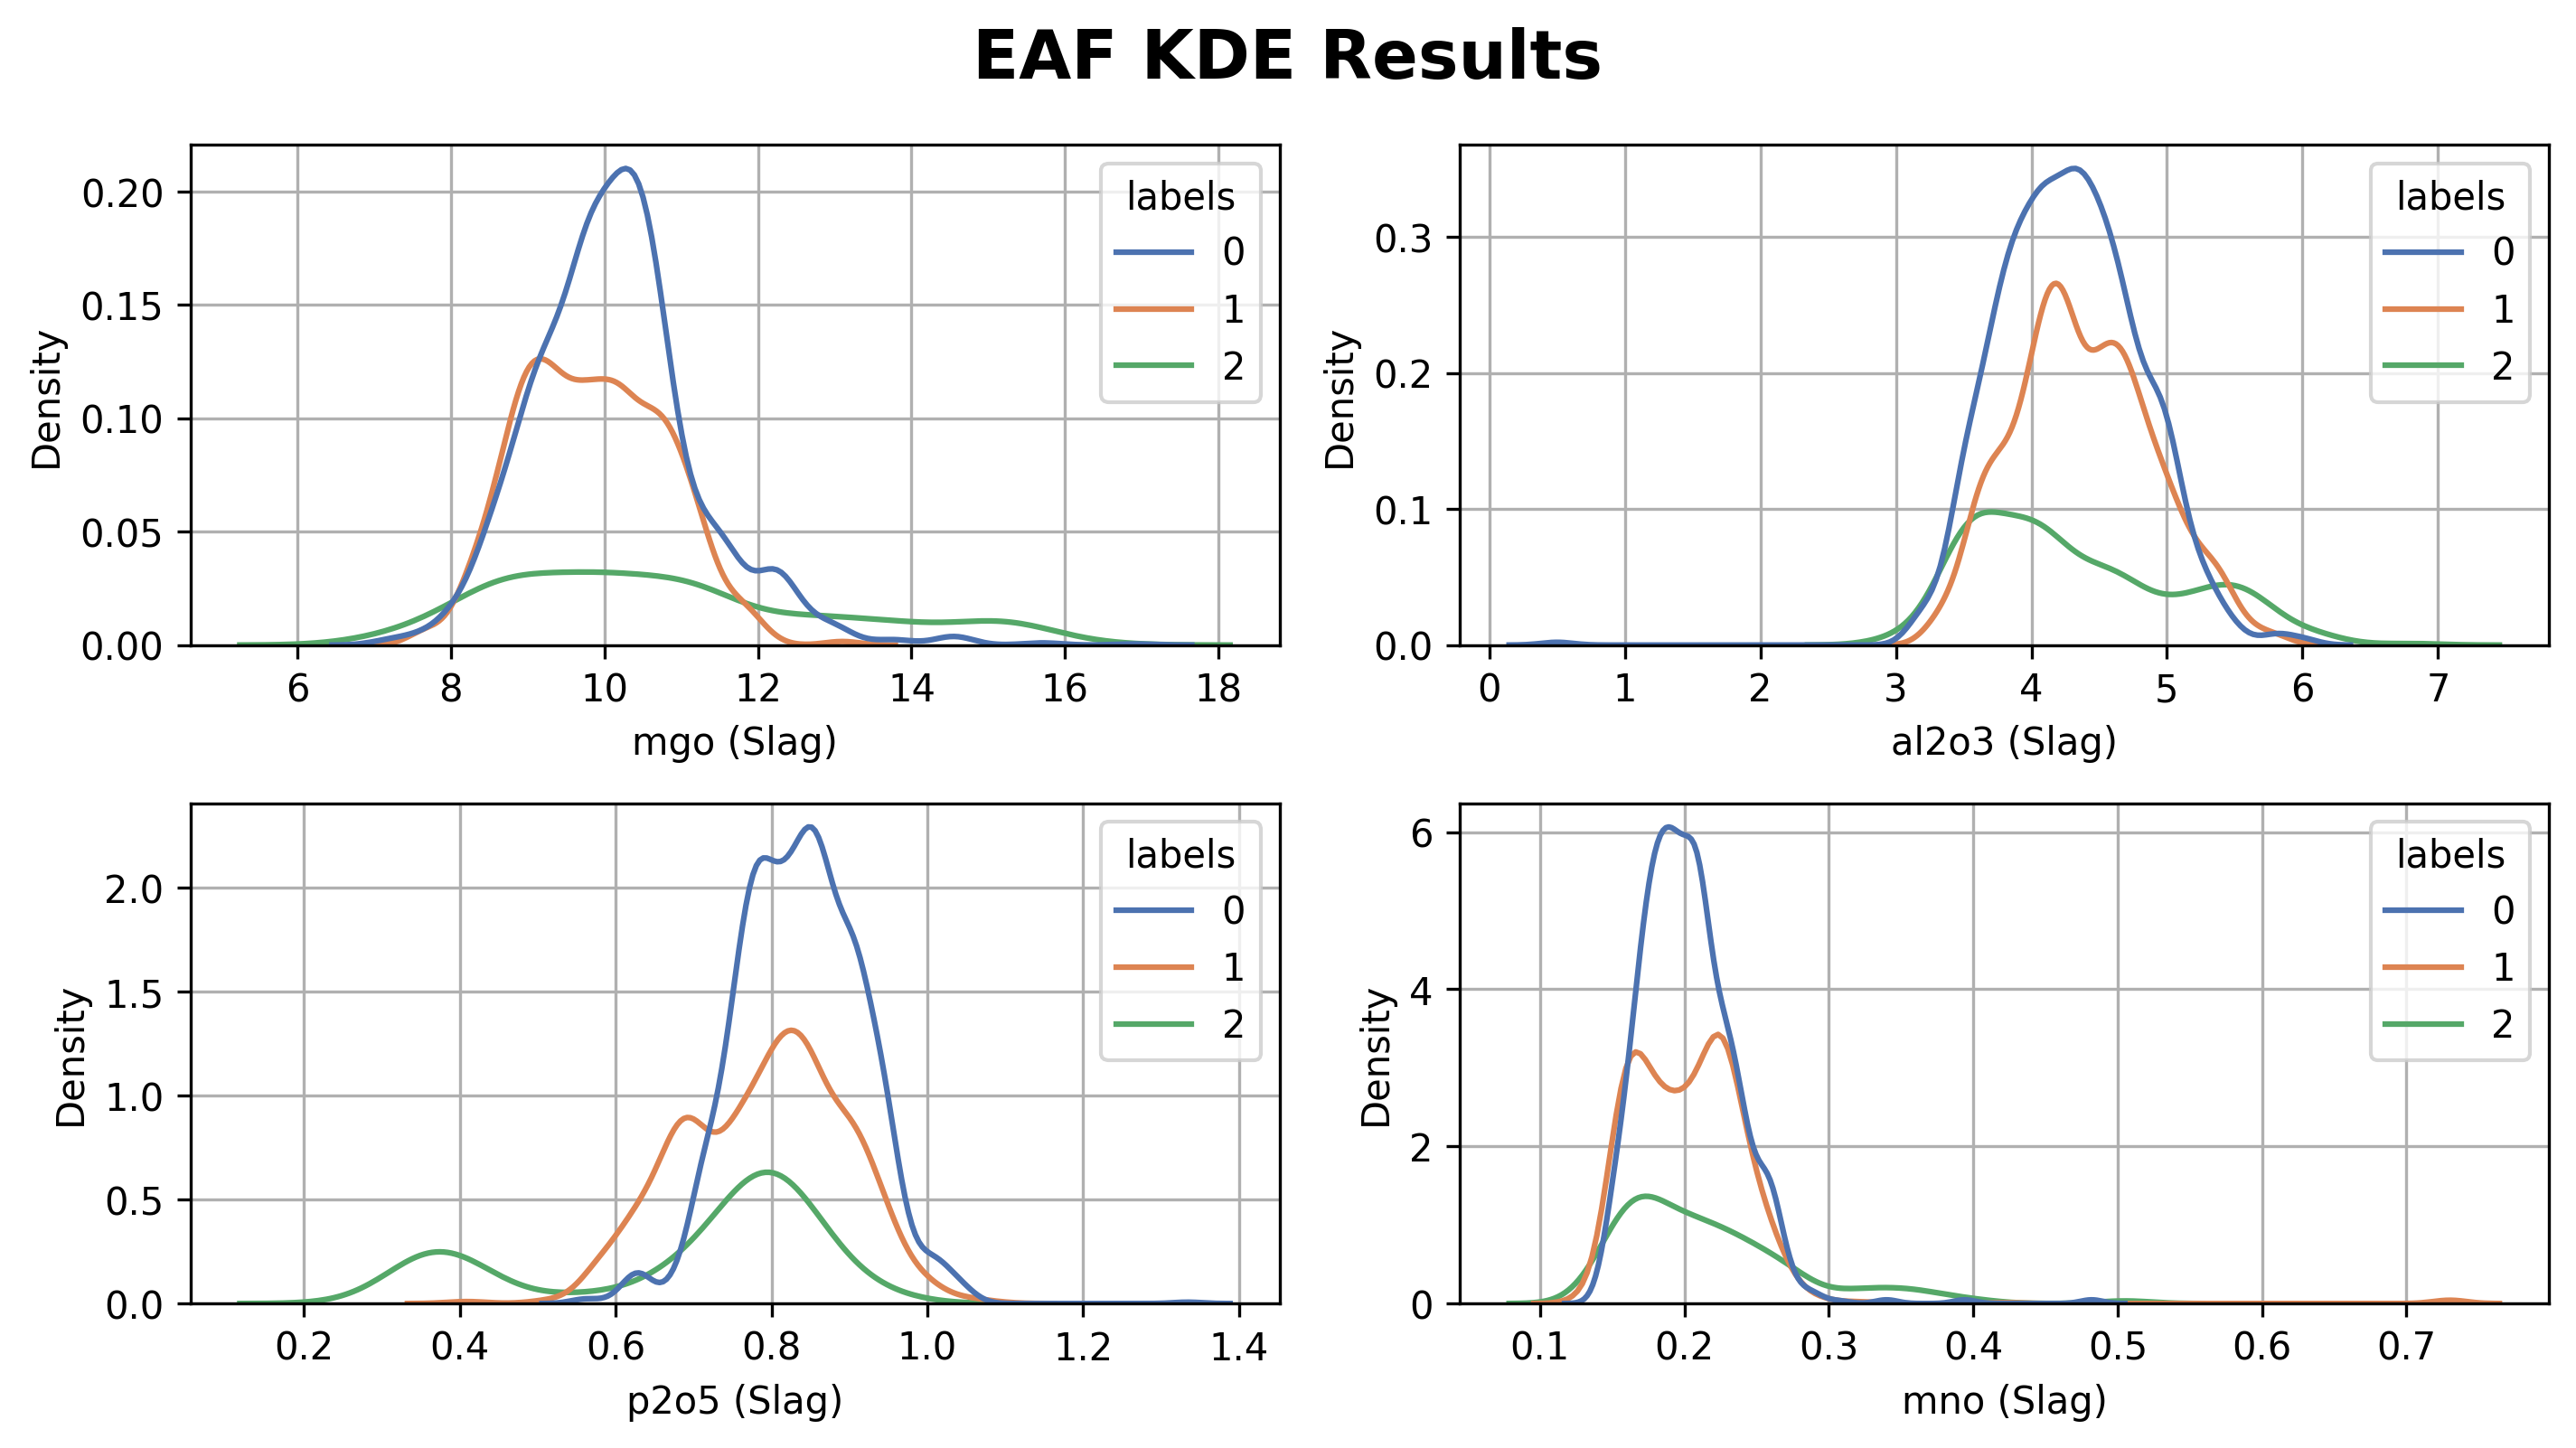

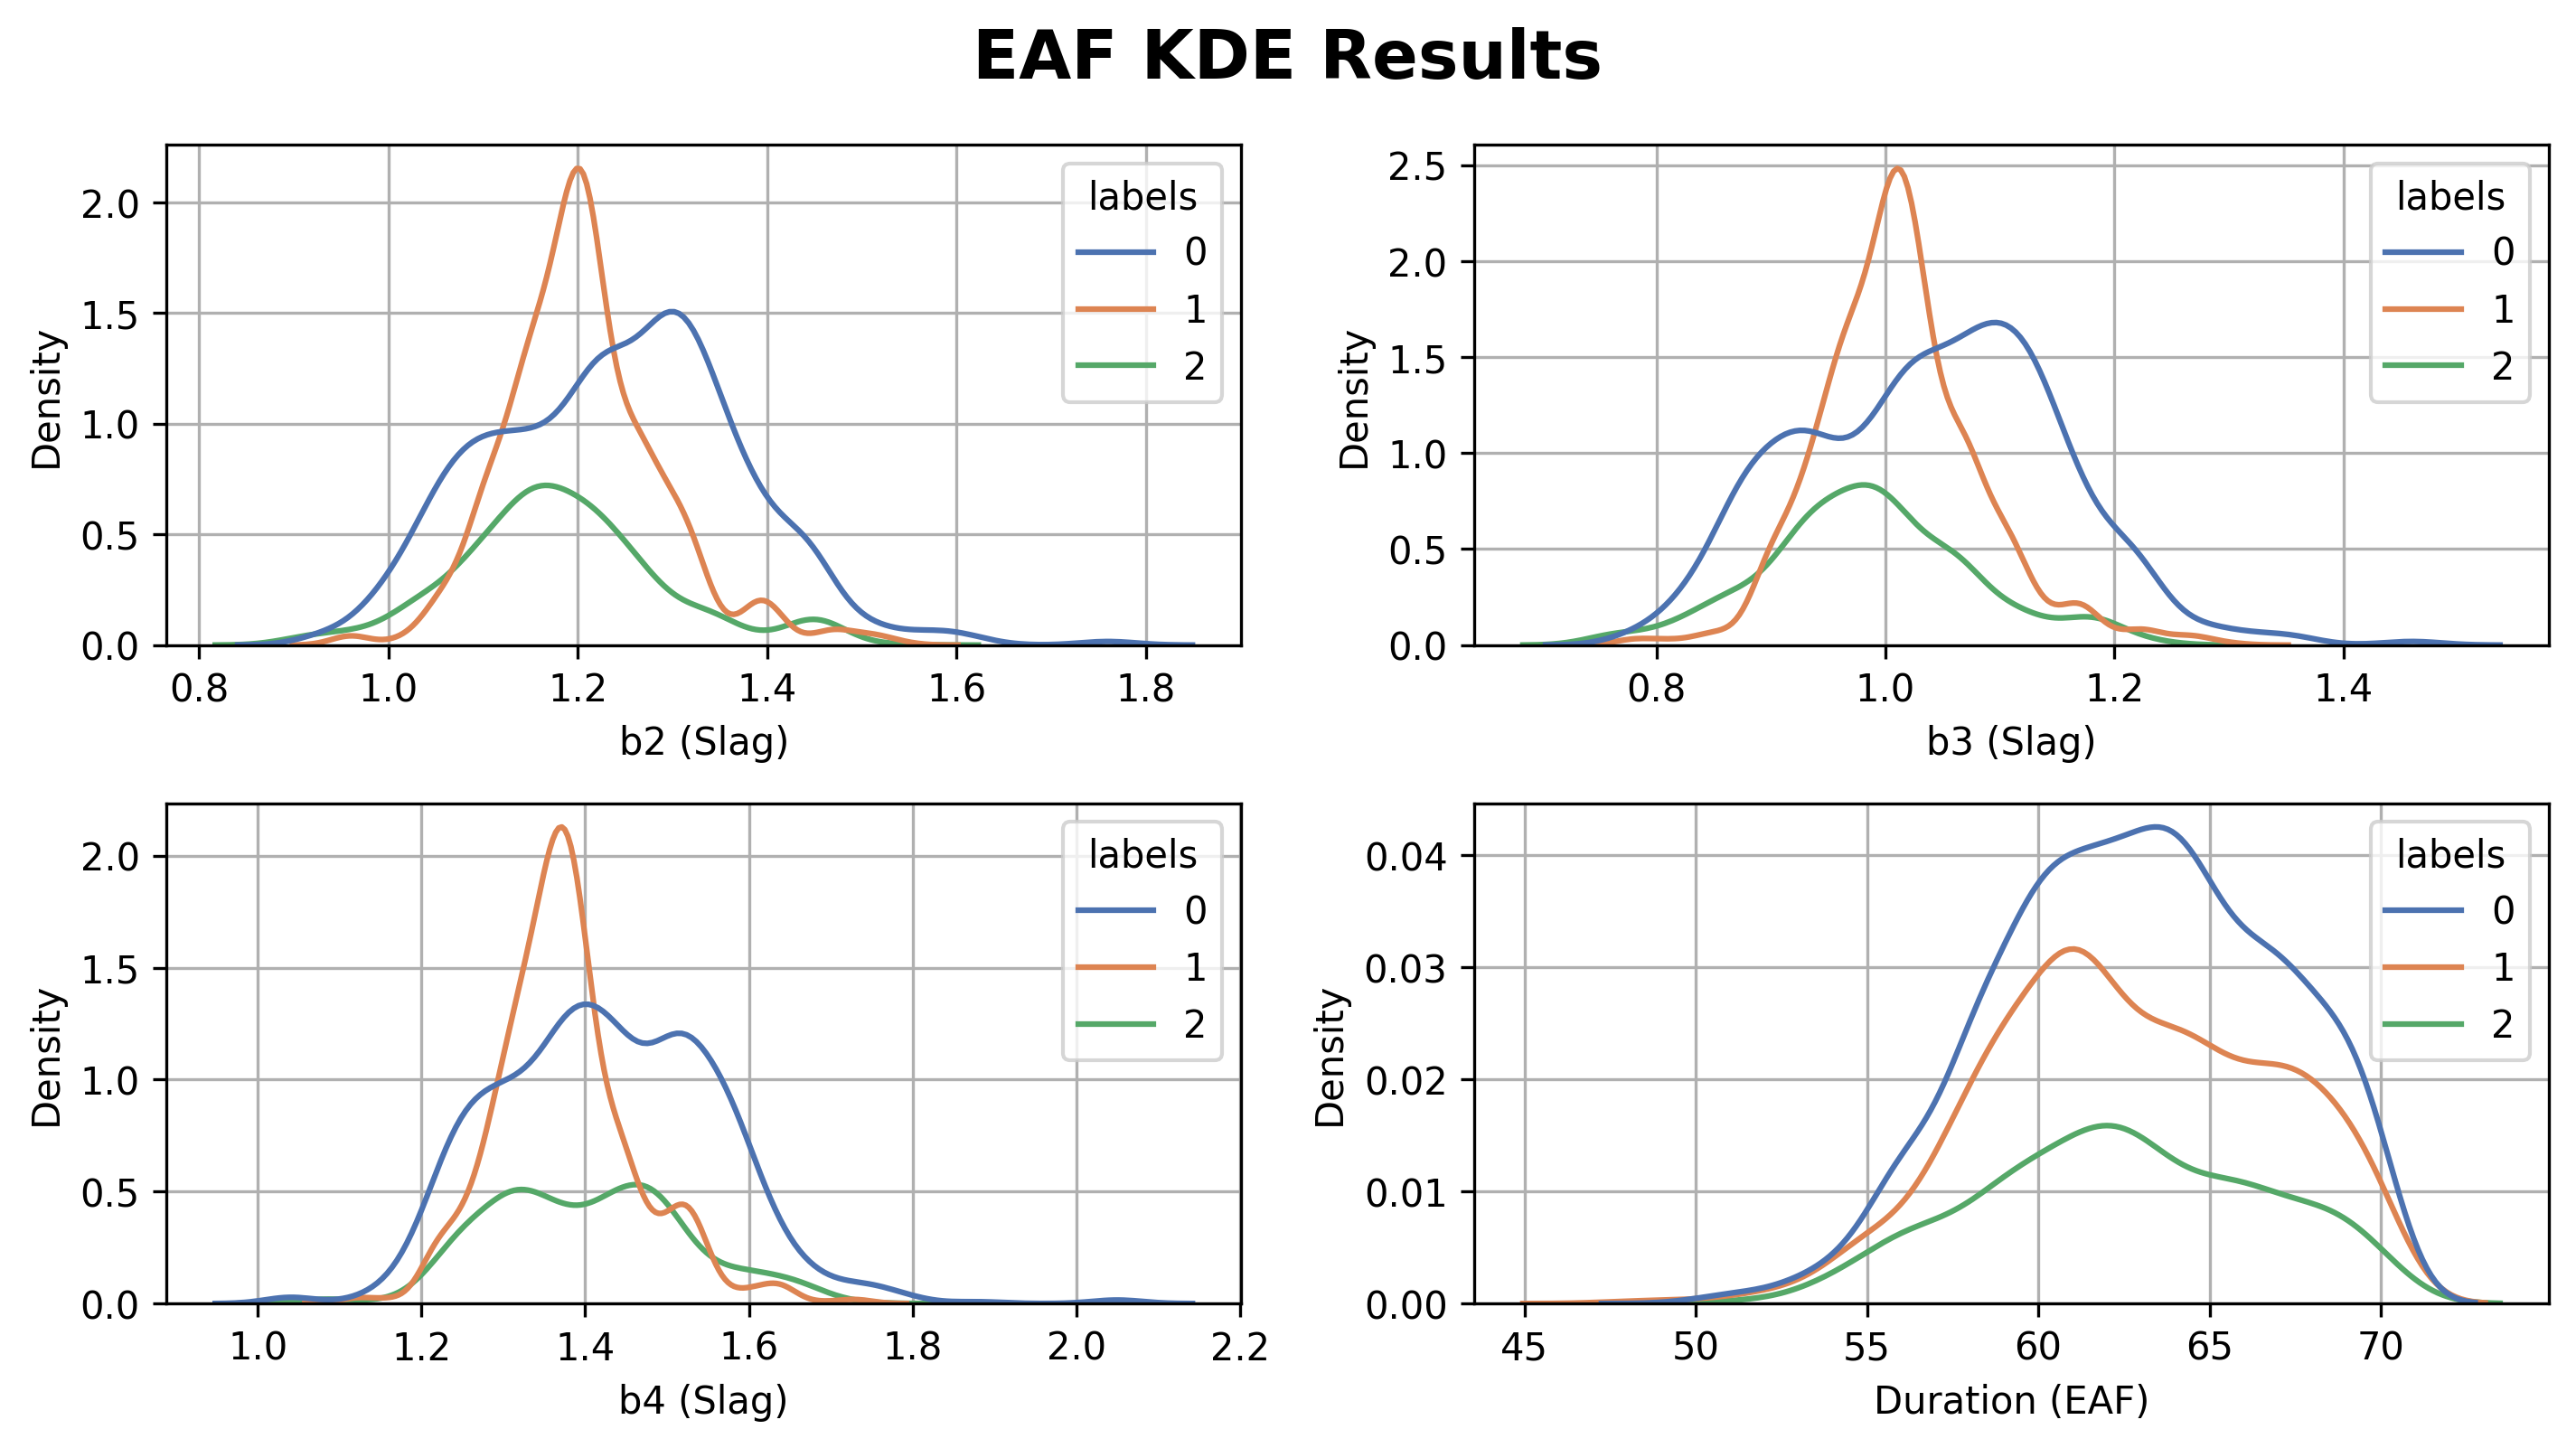

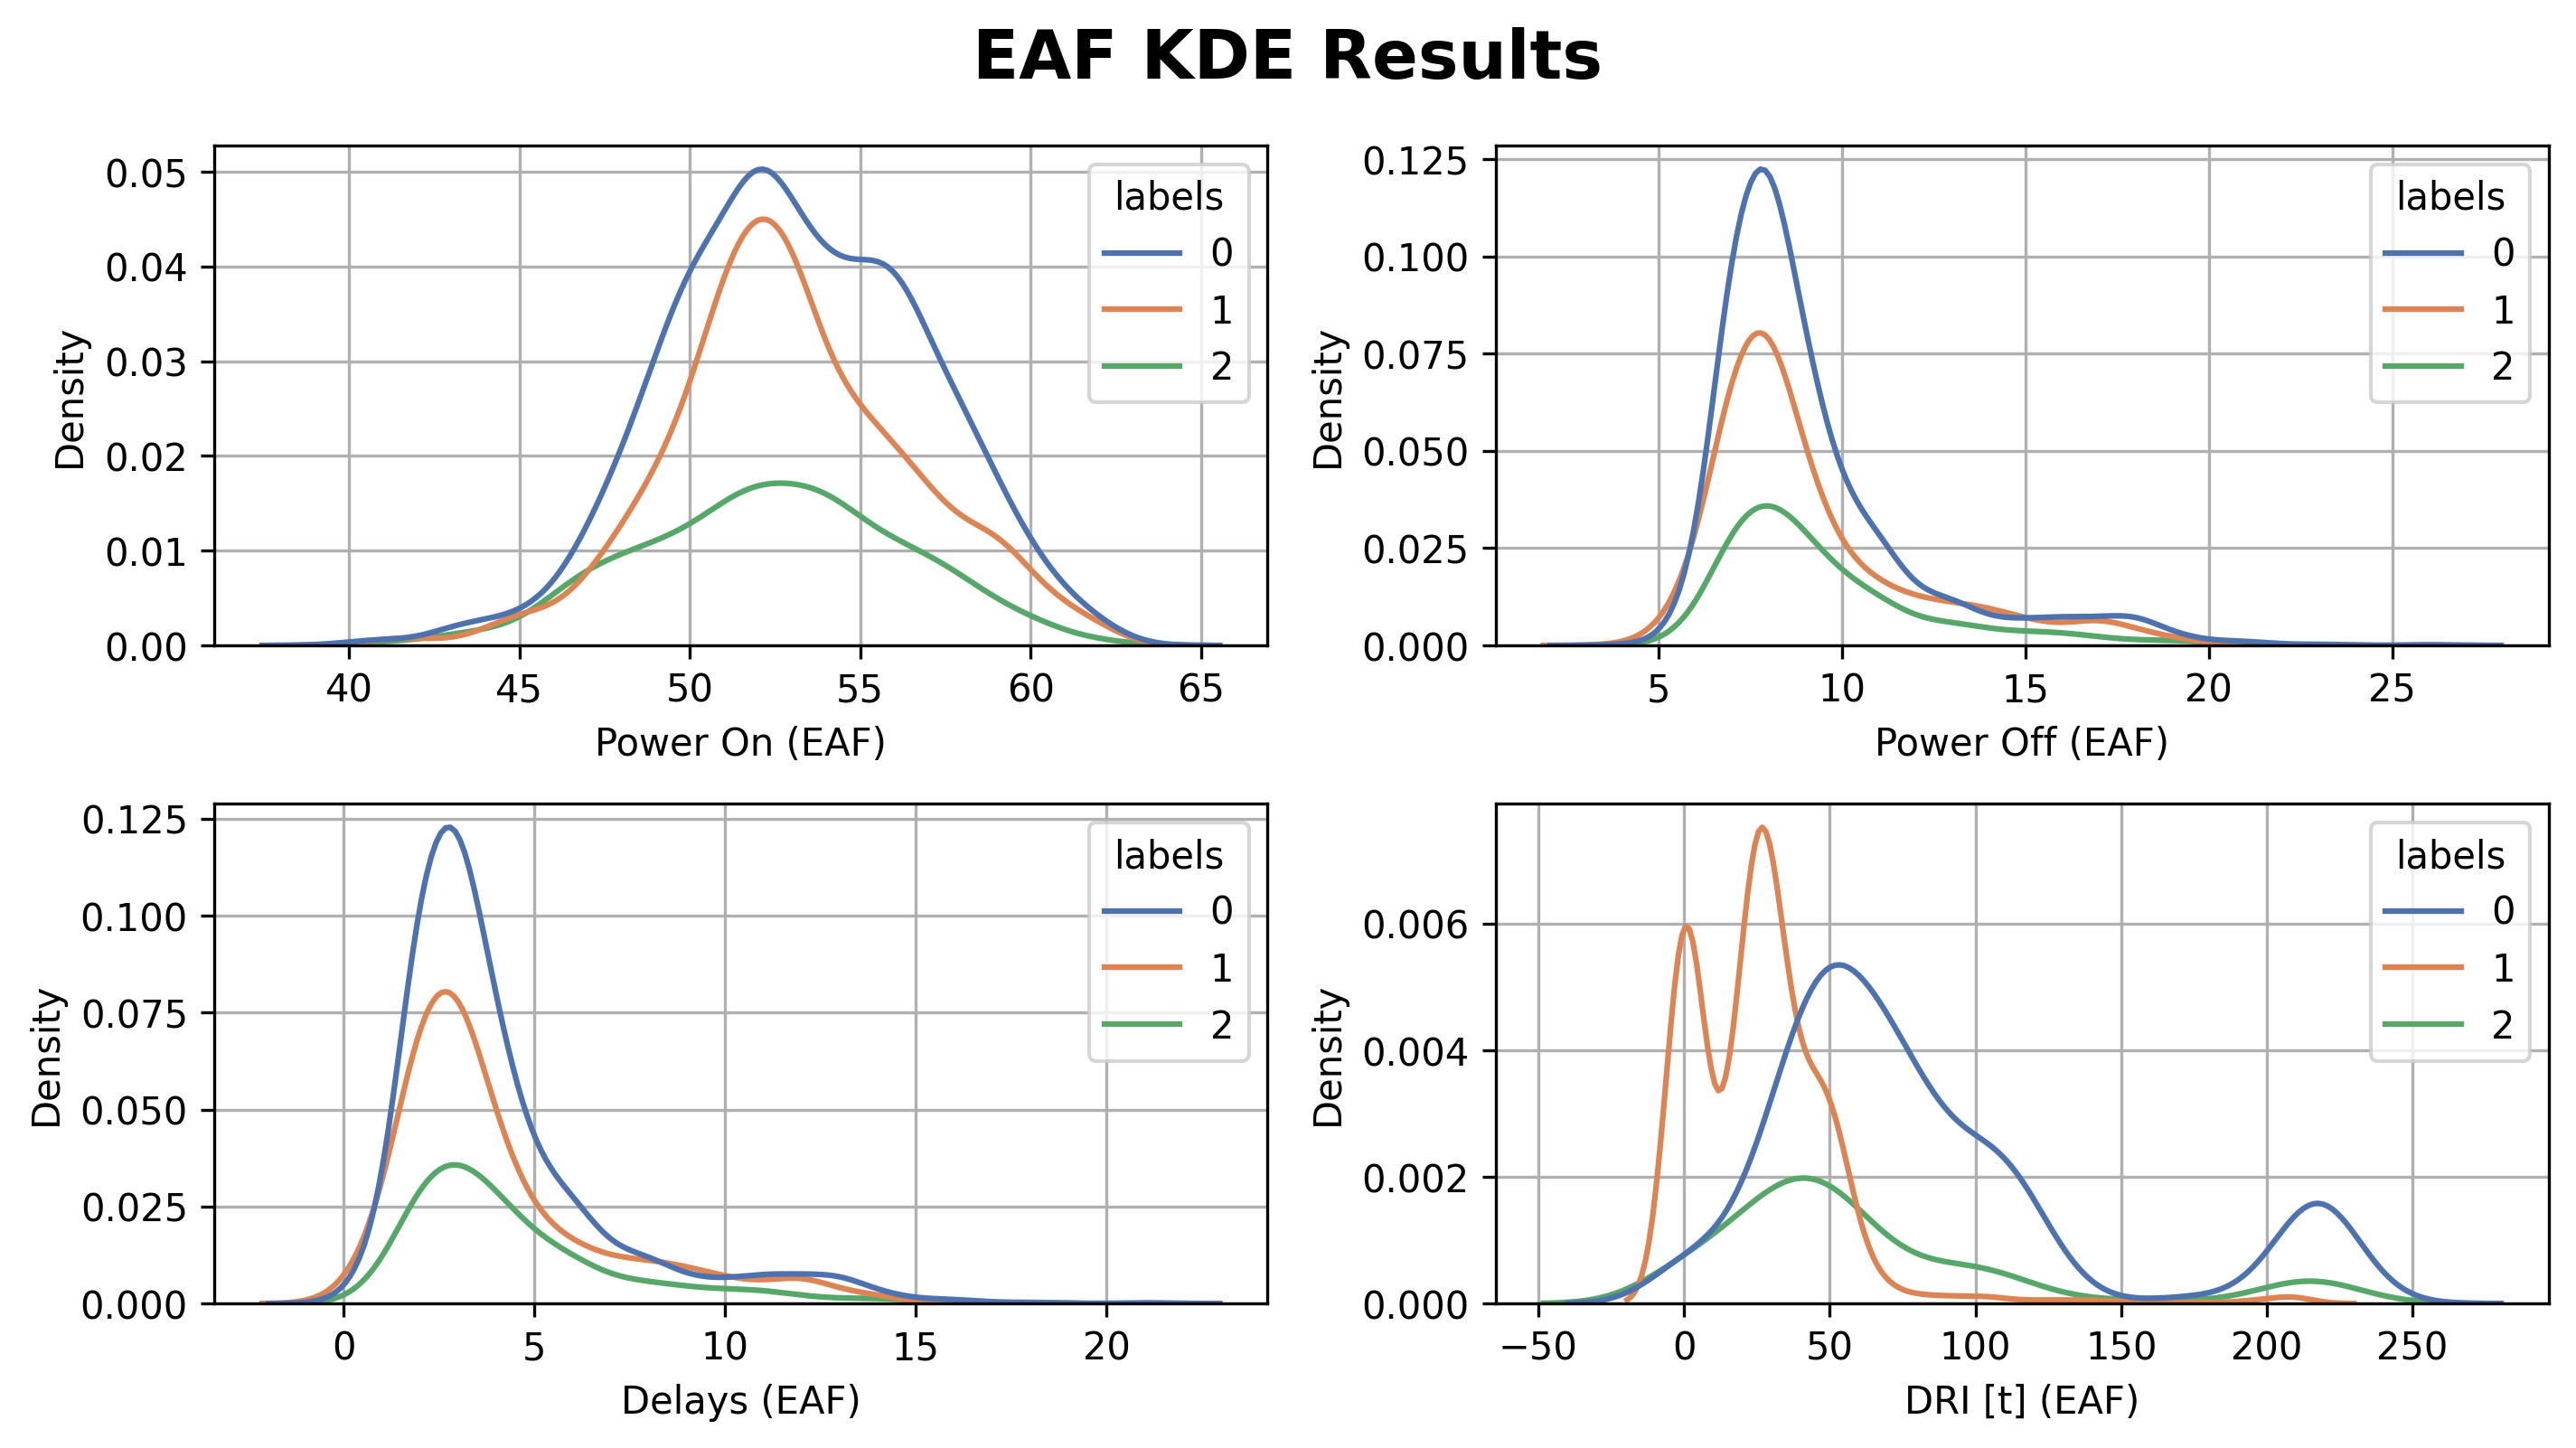

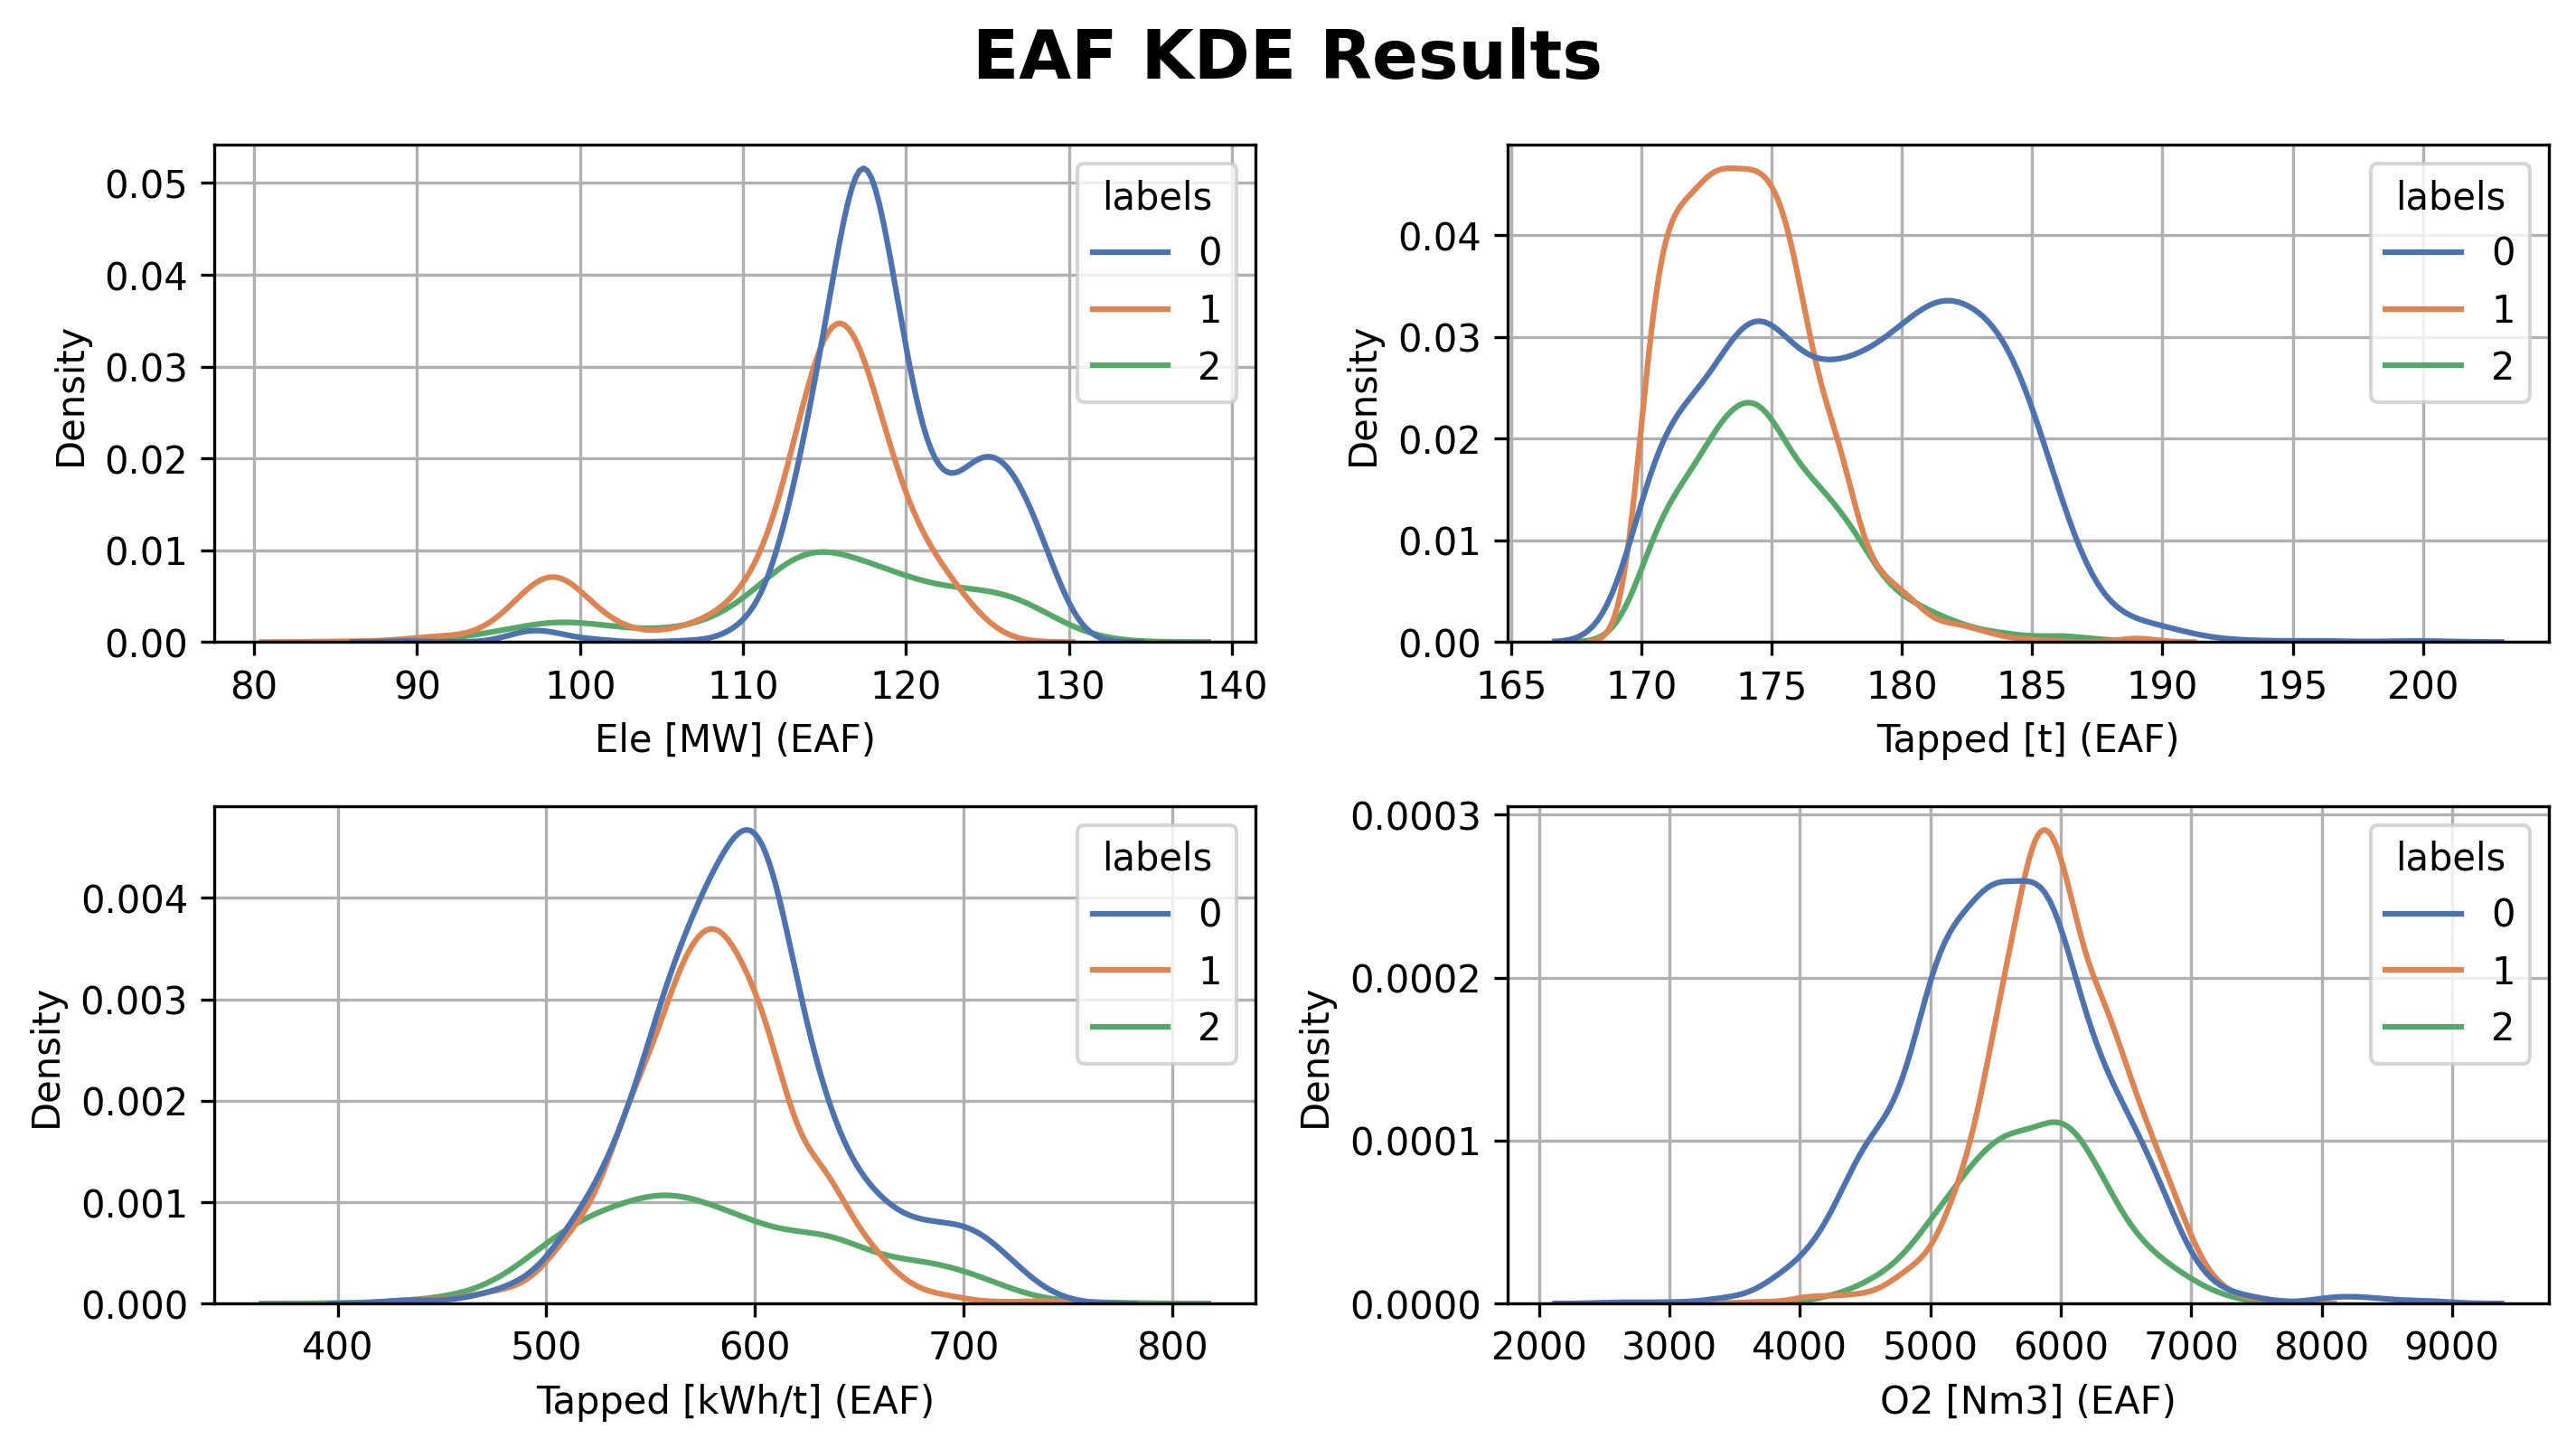

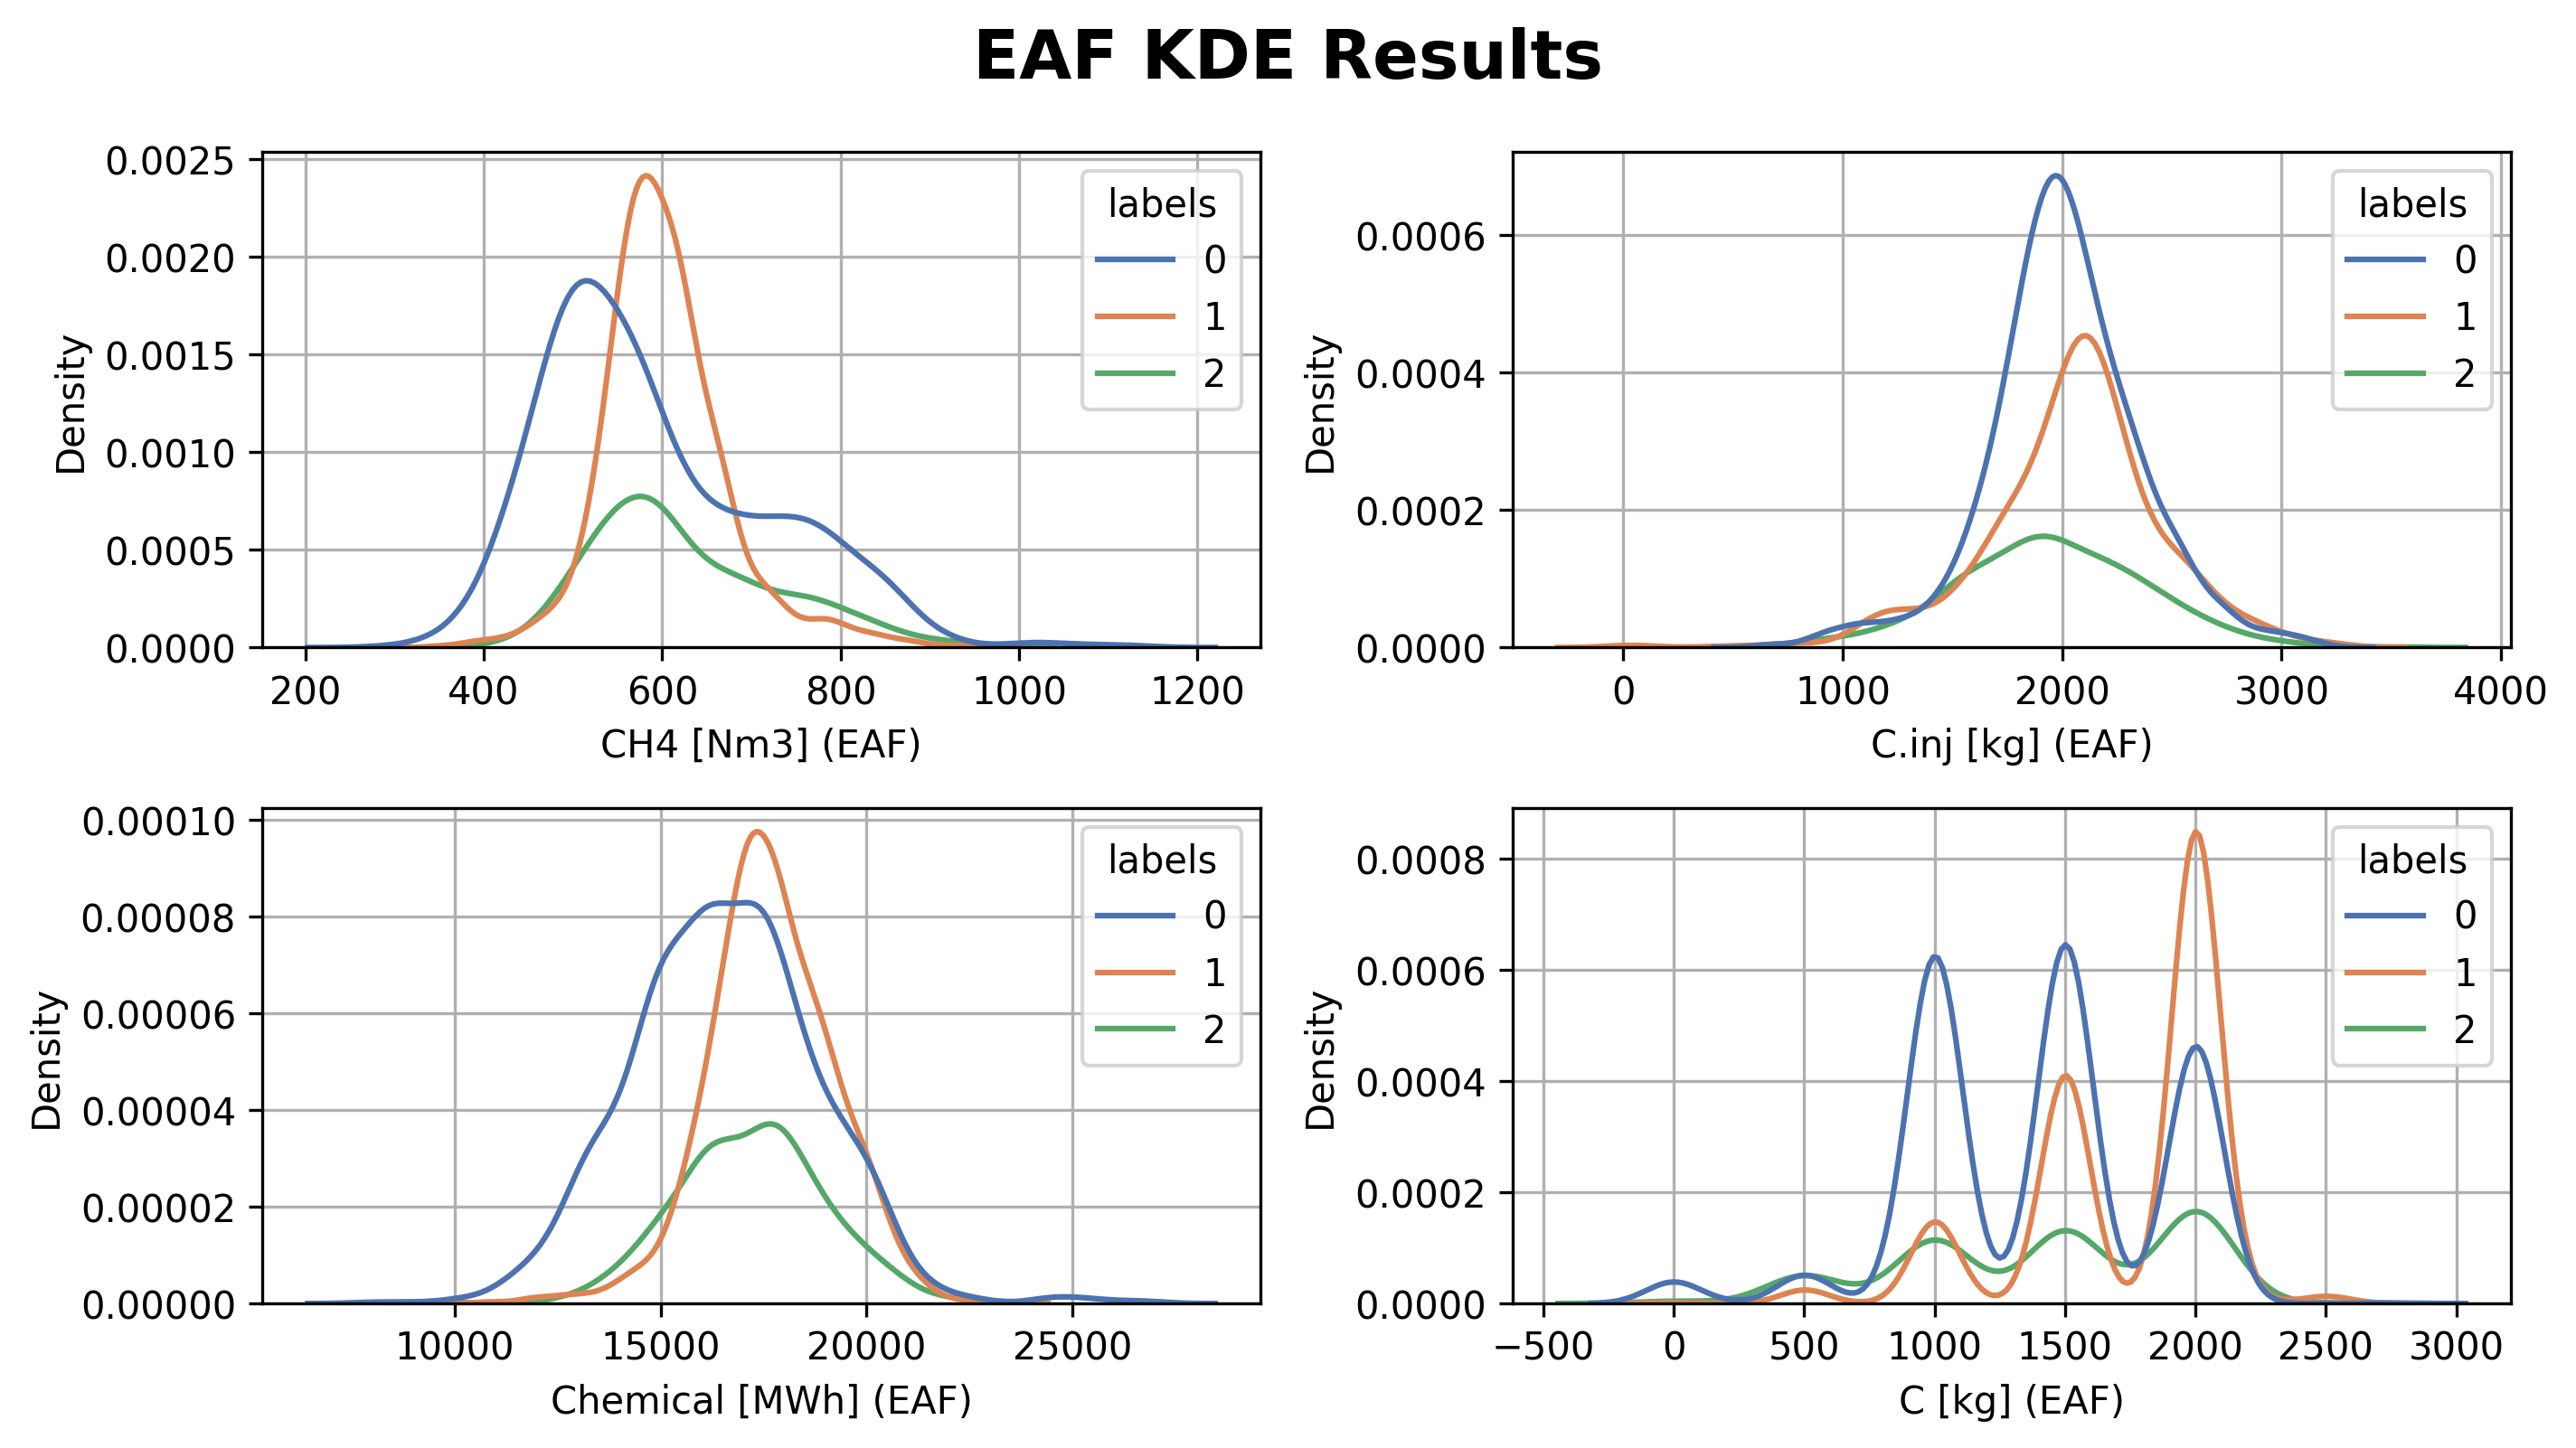

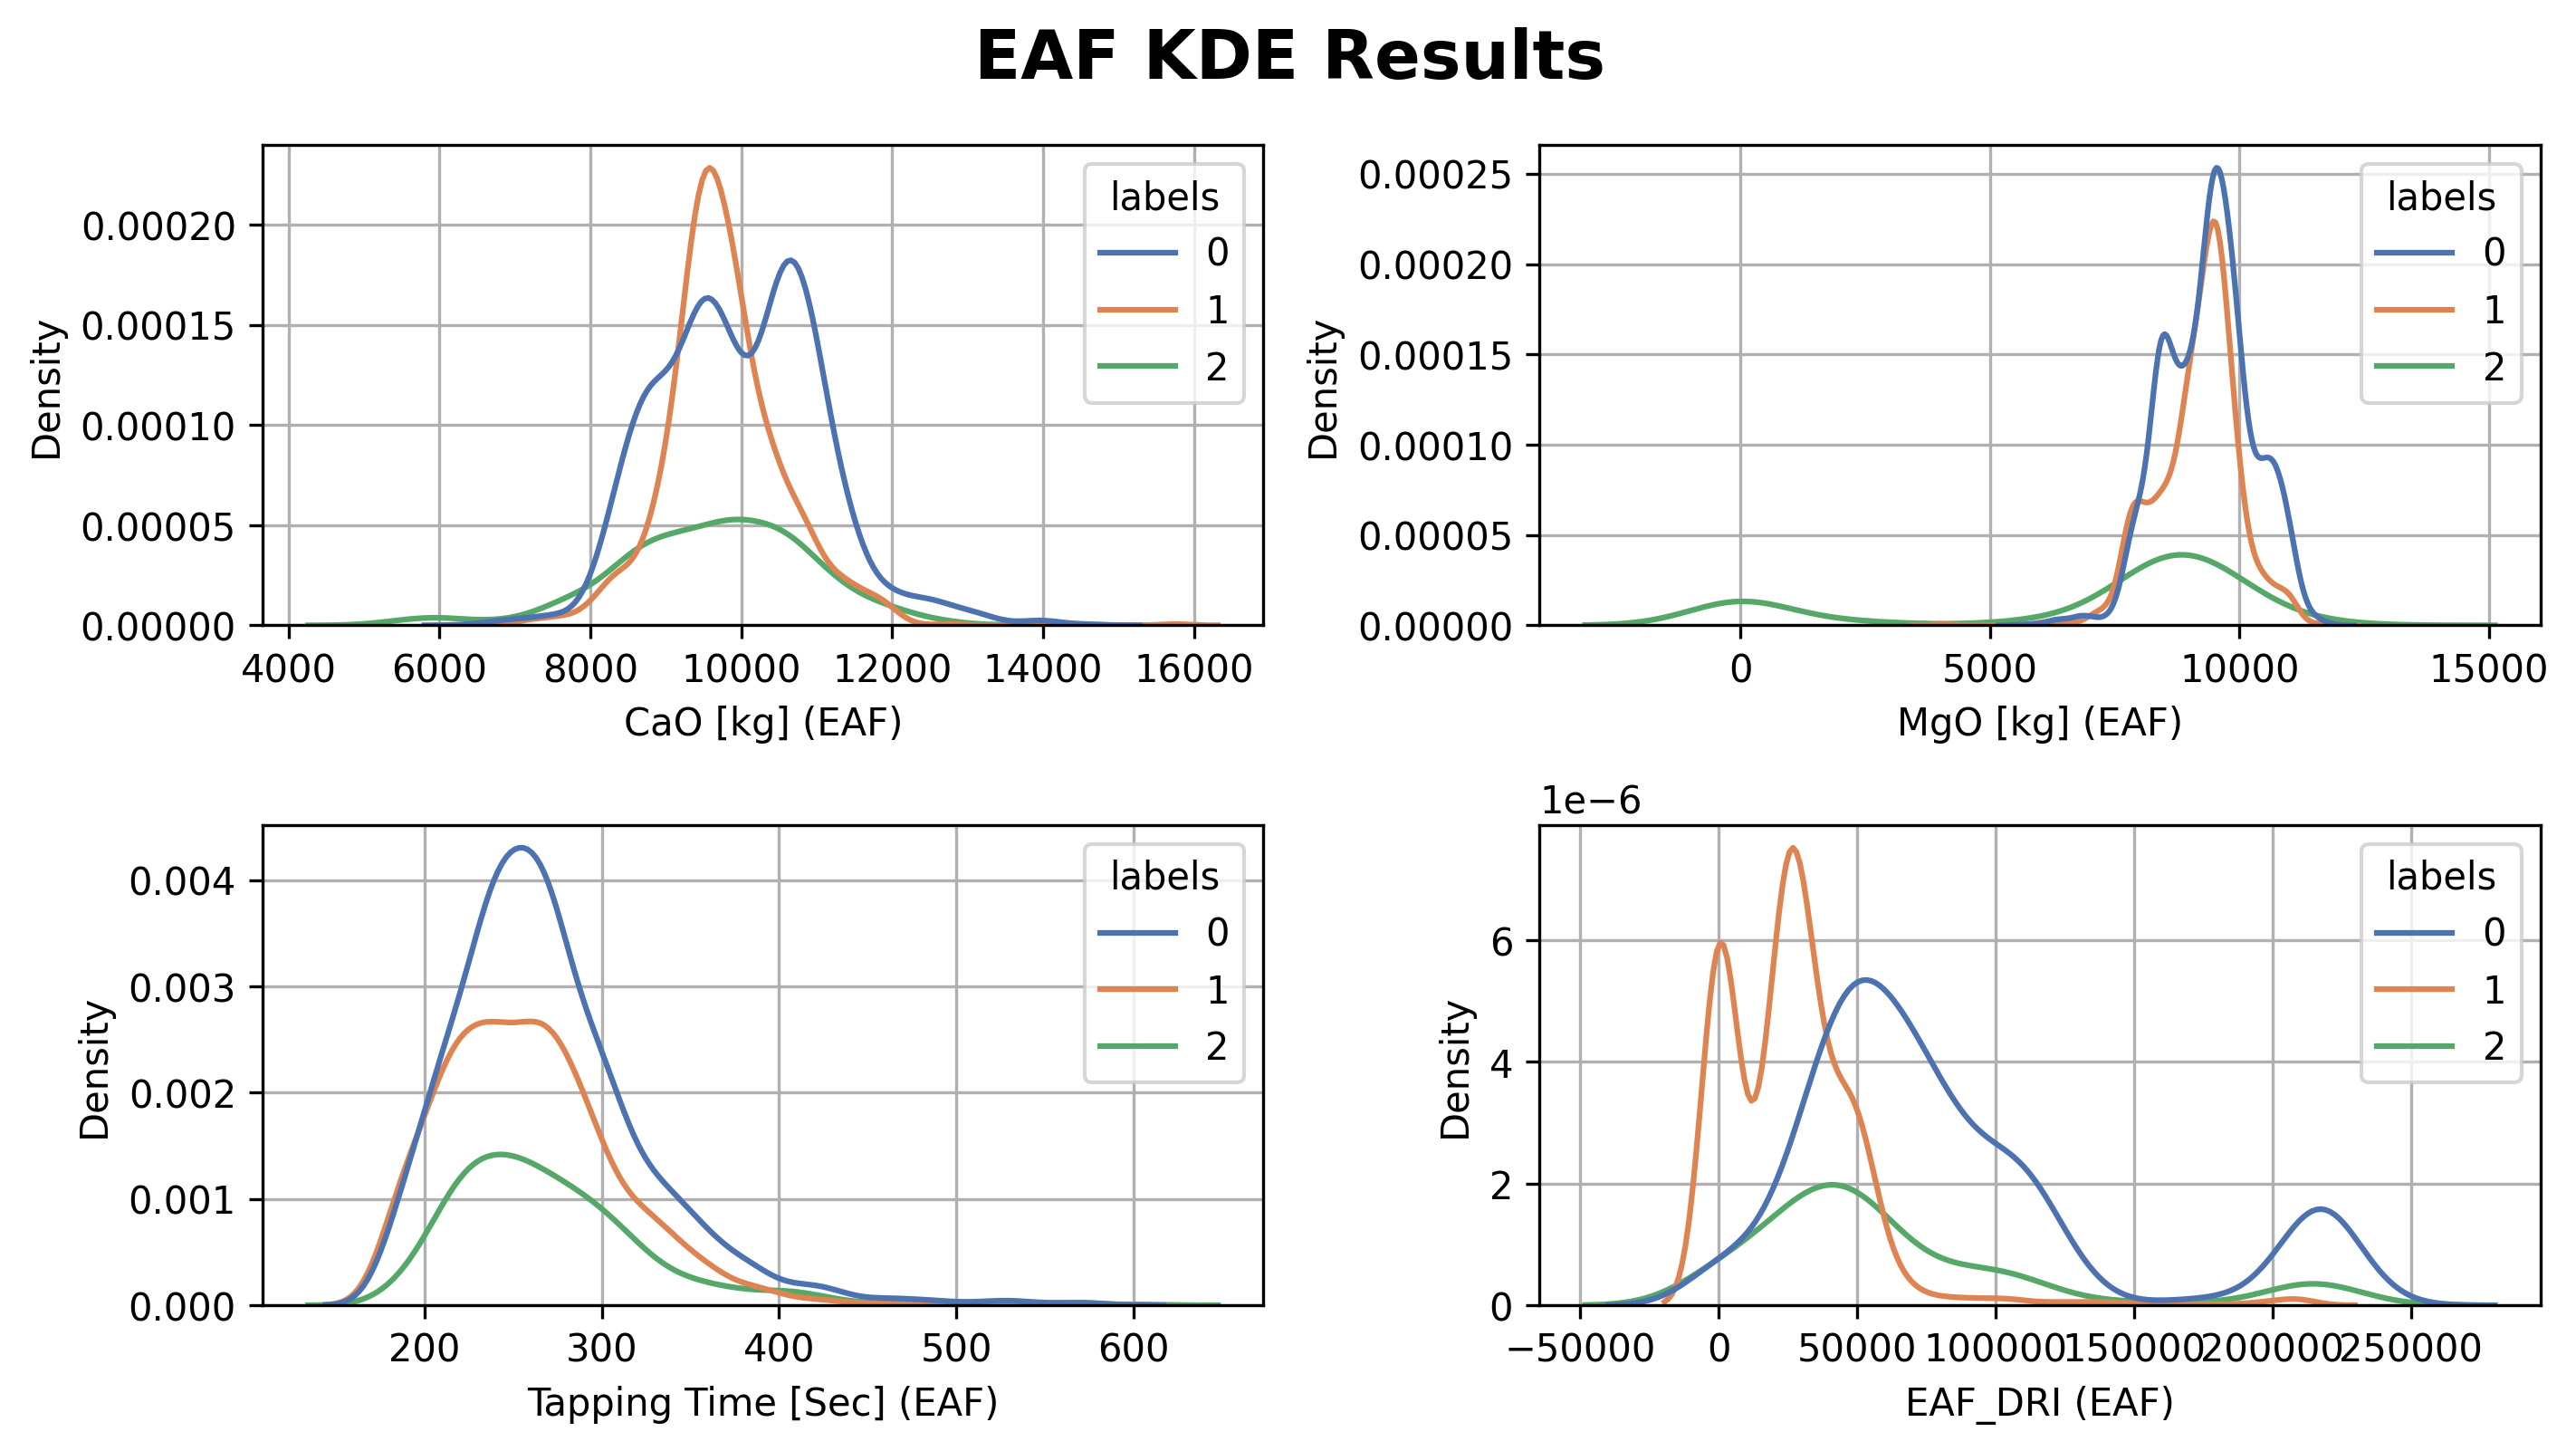

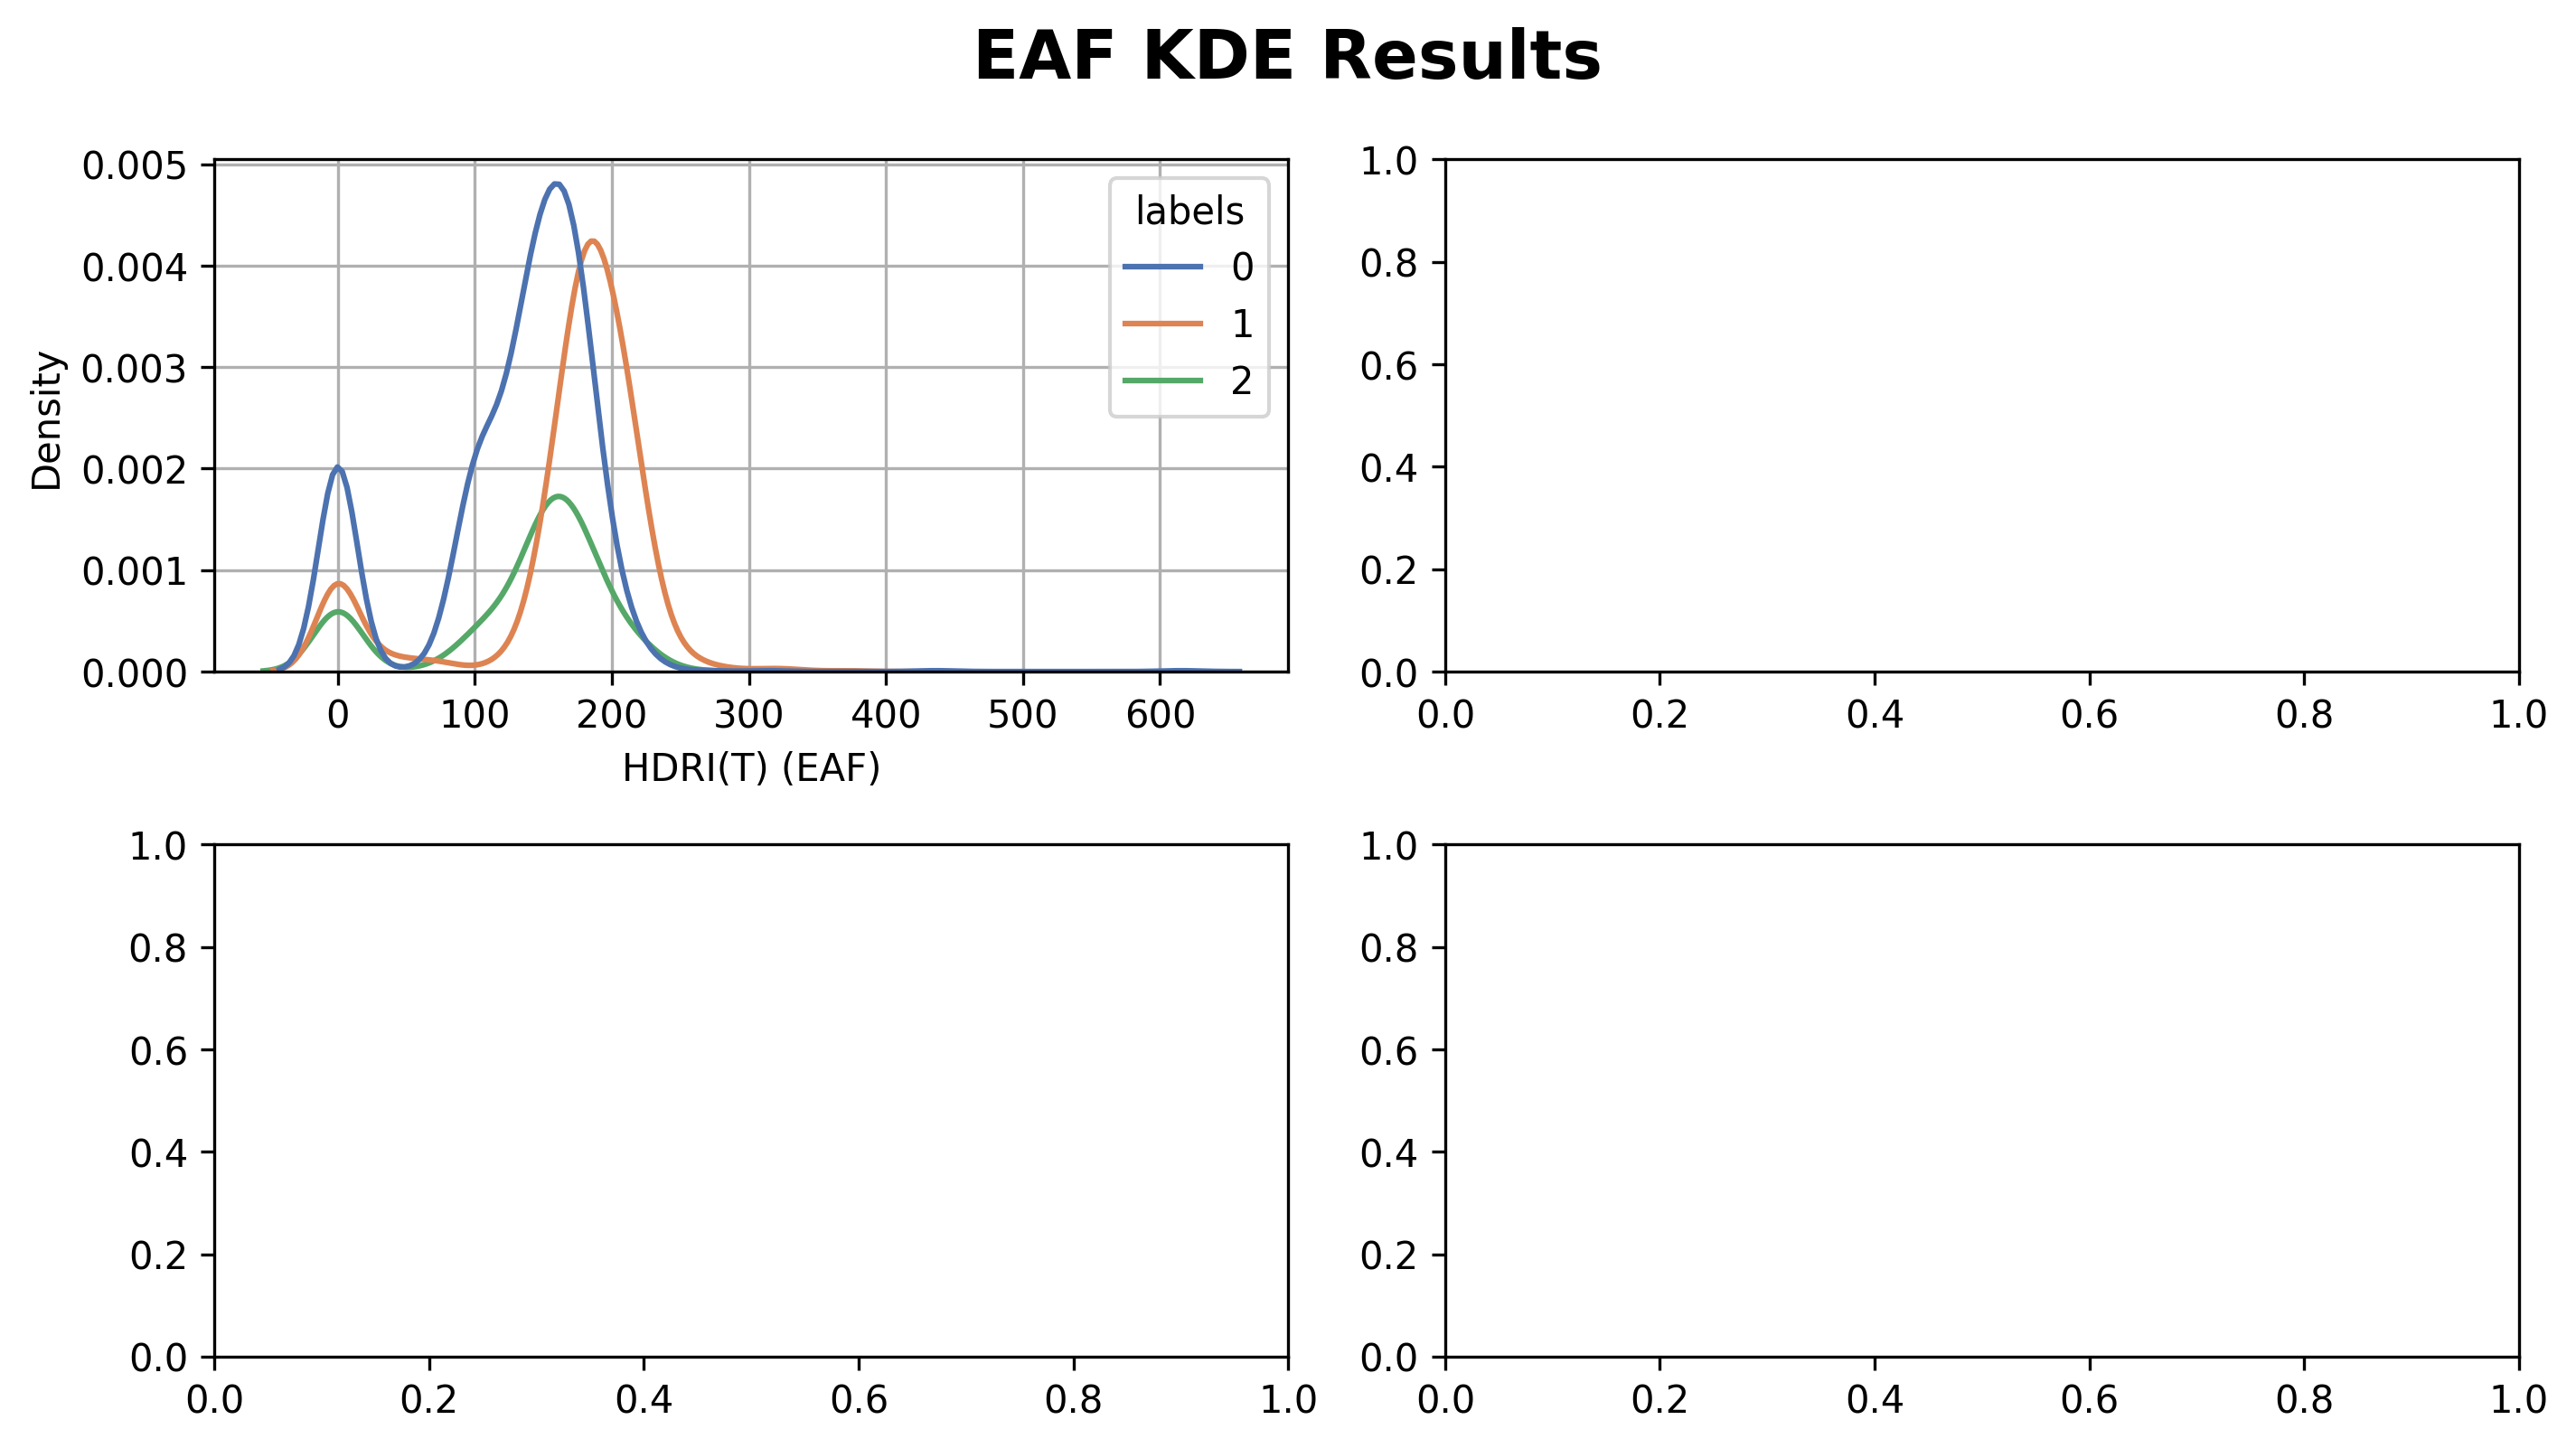

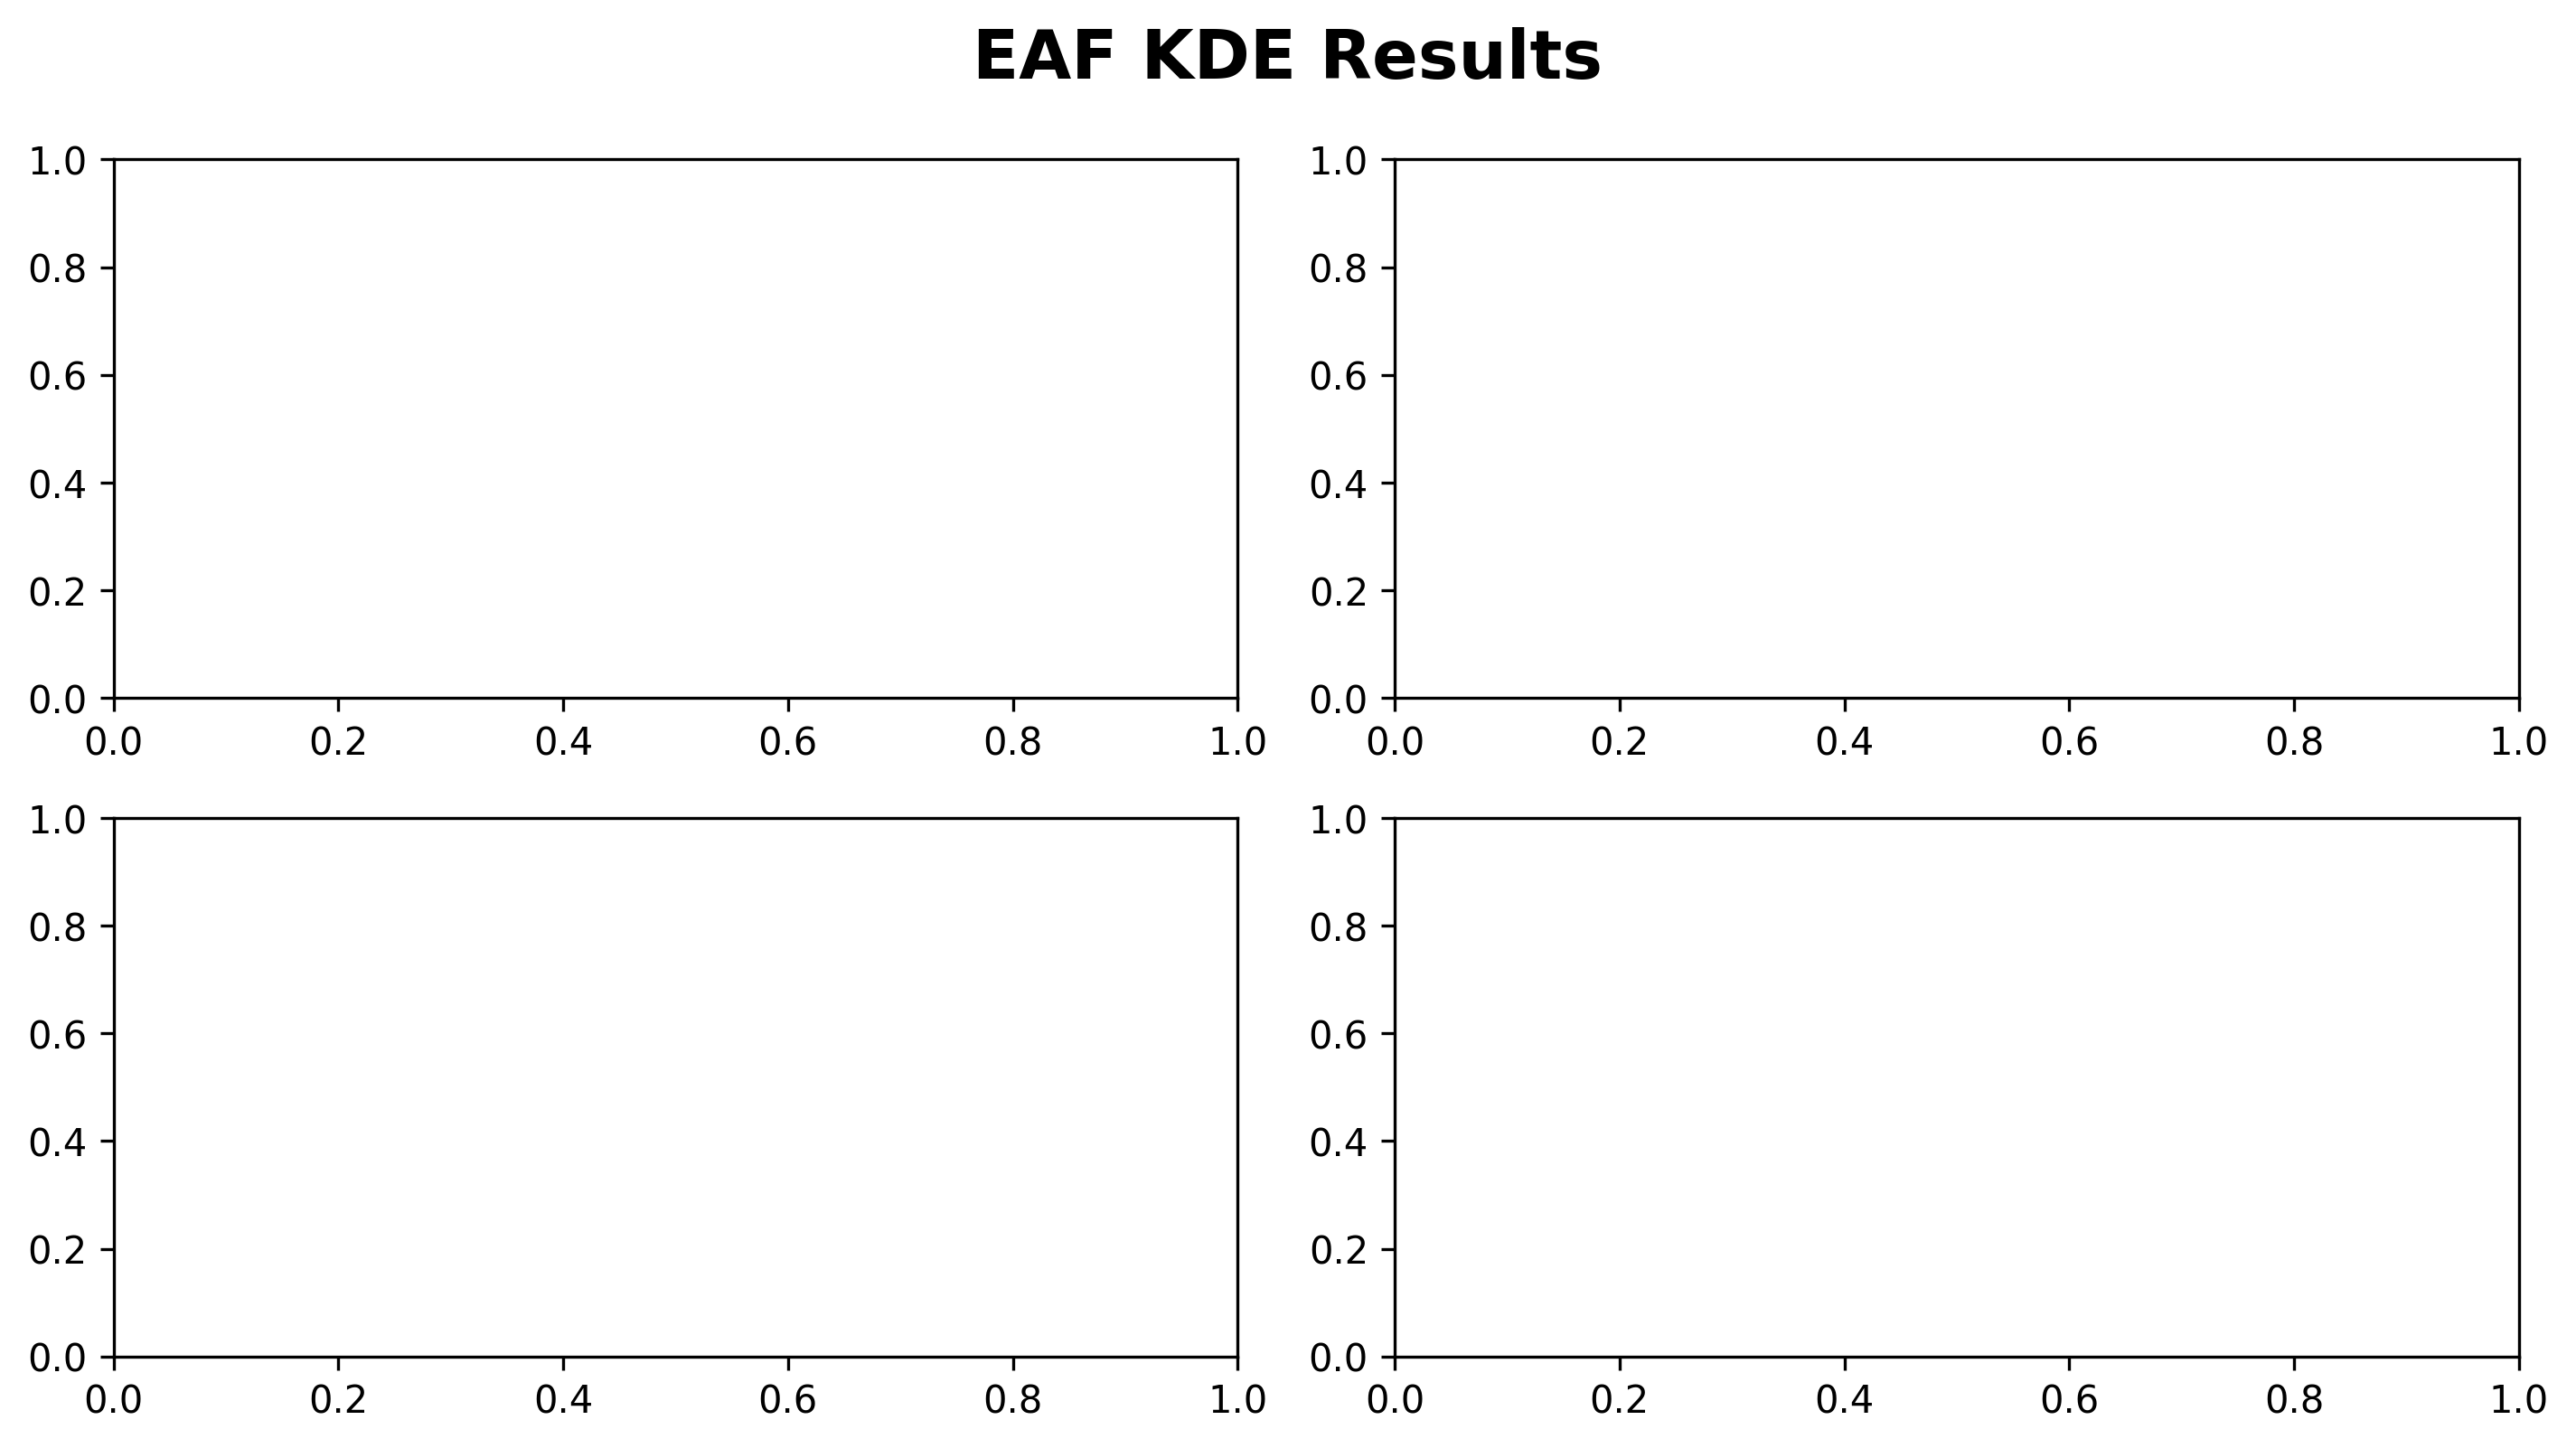

In [4]:
df = pd.read_csv(f"{working_dir}/data/eaf_and_feed_all.csv")
#--------Drop All Labels--------
df.drop(labels=['Coke1030_labels','CokeFine_labels','Dolomite_labels','Dri_labels',
                'Lime_labels','Slag_labels'] ,axis=1,inplace=True)
df.set_index(keys='Heat', inplace=True ,drop=True)
print(df.shape)
#--------Normalizing-------- 
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
print(normal_df.shape)
#--------Correlation--------
corr_df = normal_df.corr().abs()
corr_df = corr_df.where(np.triu(np.ones(corr_df.shape),k= 1).astype(bool)) #paiine matice motegharen ast ve hazf shod
high_corr_columns_name = pd.DataFrame(corr_df.ge(.95).stack().loc[lambda corr_df: corr_df].index.to_list())
print(high_corr_columns_name)
#df.drop(labels=['s315'] ,axis=1,inplace=True)
#-------Clustering---------
scale = MinMaxScaler()
normal_df = pd.DataFrame(data = scale.fit_transform(df) , columns= df.columns)
t_sne = TSNE(n_components=2, learning_rate='auto',random_state=0,
                  init='random', perplexity=50)
data=t_sne.fit_transform(normal_df)
sne_column_name = [f"SNE{column}"  for column in range(2) ]
sne_df = pd.DataFrame(data=data,columns=sne_column_name)
print(sne_df.shape)
model = AgglomerativeClustering(n_clusters = 3, metric= 'euclidean', linkage ='average')
model.fit(sne_df)
print(model.labels_.shape)
# ---------PLOT-------------
fig = plt.figure(figsize=(9.6,5.4),dpi=300)
fig.suptitle('EAF T-SNE Clusters', fontsize=18,fontweight='bold')
ax1 = fig.subplots(1,1)
ax1.set_xlabel('Axis 0', fontsize=16,fontweight='bold')
ax1.set_ylabel('Axis 1', fontsize=16,fontweight='bold')
#ax1.xaxis.set_major_locator(ticker.MultipleLocator(0.01))
cmap = sns.color_palette("deep", as_cmap=True)
sns.scatterplot(
    data=sne_df,
    x='SNE0',
    y='SNE1',
    hue=model.labels_,
    palette= cmap,
    )
fig.tight_layout()
#plt.savefig(f'{working_dir}/presentation/coke-1030-tsne-clusters.jpg')
plt.show()
#----------Labeling---------
clust_lable_dict = {0:0,1:1,2:2,3:3,4:4,5:5,6:6}
labels = [clust_lable_dict[i] for i in model.labels_]
df["labels"] = labels
print(df.shape)
#----------Labes Conditions-----
plot_name = df.columns.drop('labels')
print(plot_name)
num = 0
for k in range(14):
    fig = plt.figure(num=k,figsize=(9.6,5.4),dpi=300)
    fig.suptitle('EAF KDE Results', fontsize=18,fontweight='bold')
    ax = fig.subplots(2,2)
    #sns.set_style("ticks",{'axes.grid' : True})
    for i in range(2):
        for j in range(2):
            if num == len(plot_name):
                break
            ax[i][j].grid(True)
            sns.kdeplot(
                data=df,
                x=plot_name[num],
                hue="labels",
                #hue_order=[0,2,3,],
                fill=False,
                #alpha = 0.4,
                palette= cmap,
                ax=ax[i][j],
            )
            num = num +1
    fig.tight_layout()
#ax[0][0].xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax[0][0].axvline(83.4,color=cmap[0])
#ax[0][0].text(83.2, 0.2, '83.4', rotation=90, va='center')
#ax[0][0].axvline(80.6,color=cmap[1])
#ax[0][0].text(80.4, 0.2, '80.6', rotation=90, va='center')
#ax[0][1].xaxis.set_major_locator(ticker.MultipleLocator(0.1))
#ax[0][1].axvline(0.96,color=cmap[0])
#ax[0][1].text(0.92, 1.6, '0.96', rotation=90, va='center')
#ax[0][1].axvline(1.39,color=cmap[1])
#ax[0][1].text(1.35, 1.6, '1.39', rotation=90, va='center')
#ax[1][0].xaxis.set_major_locator(ticker.MultipleLocator(1))
#ax[1][0].axvline(2.4,color=cmap[0])
#ax[1][0].text(2.2, 0.2, '2.4', rotation=90, va='center')
#ax[1][0].axvline(1.5,color=cmap[1])
#ax[1][0].text(1.3, 0.2, '1.5', rotation=90, va='center')
#plt.savefig(f'{working_dir}/presentation/coke-1030-kde-results.jpg')
plt.show()
# save For next use
#df.to_csv(f"{working_dir}/data/coke_1030_with_labels.csv",index=True)
del df,normal_df,corr_df,high_corr_columns_name